# Differential expression analysis

## Install and import dependencies

In [1]:
source("https://bioconductor.org/biocLite.R")
biocLite()

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Old packages: 'annotate', 'BH', 'bindr', 'bindrcpp', 'biomaRt', 'blob',
  'broom', 'callr', 'ChemmineR', 'cluster', 'curl', 'd3heatmap', 'DBI',
  'dbplyr', 'dendextend', 'devtools', 'EBImage', 'ellipse', 'forcats',
  'foreign', 'fpc', 'futile.options', 'gdtools', 'GenomicAlignments',
  'GenomicFeatures', 'GenomicRanges', 'git2r', 'GlobalOptions', 'haven',
  'heatmaply', 'hexbin', 'hms', 'htmlwidgets', 'httpuv', 'imageHTS', 'knitr',
  'lambda.r', 'listviewer', 'lubridate', 'maps', 'MASS', 'Matrix',
  'matrixStats', 'MCPAN', 'mgcv', 'migest', 'mvtnorm', 'nlme', 'officer',
  'openssl', 'pcaPP', 'pillar', 'plogr', 'pryr', 'psych', 'quantreg', 'R.oo',
  'Rcpp', 'Rcssplot', 'RCurl', 'readxl', 'repr', 'reprex', 'rgl', 'rlang',
  'RMariaDB', 'rmarkdown', 'RMySQL', 'robustbase', 'rpart', 'RSQLite',
  'rtracklayer', 'rvg', 

In [2]:
biocLite(c("limma", "Glimma", "edgeR"))

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Installing package(s) ‘limma’, ‘Glimma’, ‘edgeR’



The downloaded binary packages are in
	/var/folders/rg/srm_l7bx76l4q54xwrg_xv551z72j_/T//Rtmpjafy30/downloaded_packages


Old packages: 'annotate', 'BH', 'bindr', 'bindrcpp', 'biomaRt', 'blob',
  'broom', 'callr', 'ChemmineR', 'cluster', 'curl', 'd3heatmap', 'DBI',
  'dbplyr', 'dendextend', 'devtools', 'EBImage', 'ellipse', 'forcats',
  'foreign', 'fpc', 'futile.options', 'gdtools', 'GenomicAlignments',
  'GenomicFeatures', 'GenomicRanges', 'git2r', 'GlobalOptions', 'haven',
  'heatmaply', 'hexbin', 'hms', 'htmlwidgets', 'httpuv', 'imageHTS', 'knitr',
  'lambda.r', 'listviewer', 'lubridate', 'maps', 'MASS', 'Matrix',
  'matrixStats', 'MCPAN', 'mgcv', 'migest', 'mvtnorm', 'nlme', 'officer',
  'openssl', 'pcaPP', 'pillar', 'plogr', 'pryr', 'psych', 'quantreg', 'R.oo',
  'Rcpp', 'Rcssplot', 'RCurl', 'readxl', 'repr', 'reprex', 'rgl', 'rlang',
  'RMariaDB', 'rmarkdown', 'RMySQL', 'robustbase', 'rpart', 'RSQLite',
  'rtracklayer', 'rvg', 'selectr', 'seriation', 'shape', 'shinydashboard',
  'sigmaNet', 'sourcetools', 'stringi', 'stringr', 'survival', 'tibble',
  'tidyr', 'tidyselect', 'tikzDevice', 'viridis', '

In [3]:
library(limma)
library(Glimma)
library(edgeR)
library(RColorBrewer)
library(scales)

Warning message:
“package ‘limma’ was built under R version 3.4.3”Warning message:
“package ‘Glimma’ was built under R version 3.4.2”Warning message:
“package ‘edgeR’ was built under R version 3.4.3”

In [4]:
getwd()

[1] "/Users/lvulliard/OneShotProject/RecArg1"

## Example analysis
https://www.bioconductor.org/help/workflows/RNAseq123/

In [5]:
biocLite("Mus.musculus")
library(Mus.musculus)

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Installing package(s) ‘Mus.musculus’
installing the source package ‘Mus.musculus’

Old packages: 'annotate', 'BH', 'bindr', 'bindrcpp', 'biomaRt', 'blob',
  'broom', 'callr', 'ChemmineR', 'cluster', 'curl', 'd3heatmap', 'DBI',
  'dbplyr', 'dendextend', 'devtools', 'EBImage', 'ellipse', 'forcats',
  'foreign', 'fpc', 'futile.options', 'gdtools', 'GenomicAlignments',
  'GenomicFeatures', 'GenomicRanges', 'git2r', 'GlobalOptions', 'haven',
  'heatmaply', 'hexbin', 'hms', 'htmlwidgets', 'httpuv', 'imageHTS', 'knitr',
  'lambda.r', 'listviewer', 'lubridate', 'maps', 'MASS', 'Matrix',
  'matrixStats', 'MCPAN', 'mgcv', 'migest', 'mvtnorm', 'nlme', 'officer',
  'openssl', 'pcaPP', 'pillar', 'plogr', 'pryr', 'psych', 'quantreg', 'R.oo',
  'Rcpp', 'Rcssplot', 'RCurl', 'readxl', 'repr', 'reprex', 'rgl', 'rlang',
  'RMariaDB', 'rmarkdown', 'RMySQL', 'robustbase', 'rpart', 'RSQLite',
  'rtrack

### Load input files

In [6]:
url <- "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE63310&format=file"
utils::download.file(url, destfile="GSE63310_RAW.tar", mode="wb") 
utils::untar("GSE63310_RAW.tar", exdir = ".")
files <- c("GSM1545535_10_6_5_11.txt", "GSM1545536_9_6_5_11.txt", "GSM1545538_purep53.txt",
  "GSM1545539_JMS8-2.txt", "GSM1545540_JMS8-3.txt", "GSM1545541_JMS8-4.txt",
  "GSM1545542_JMS8-5.txt", "GSM1545544_JMS9-P7c.txt", "GSM1545545_JMS9-P8c.txt")
for(i in paste(files, ".gz", sep=""))
  R.utils::gunzip(i, overwrite=TRUE)

In [7]:
files <- c("GSM1545535_10_6_5_11.txt", "GSM1545536_9_6_5_11.txt", 
   "GSM1545538_purep53.txt", "GSM1545539_JMS8-2.txt", 
   "GSM1545540_JMS8-3.txt", "GSM1545541_JMS8-4.txt", 
   "GSM1545542_JMS8-5.txt", "GSM1545544_JMS9-P7c.txt", 
   "GSM1545545_JMS9-P8c.txt")
# Show data format
read.delim(files[1], nrow=5)

EntrezID  GeneLength Count
1    497097 3634       1    
2 100503874 3259       0    
3 100038431 1634       0    
4     19888 9747       0    
5     20671 3130       1

In [8]:
# Directly construct matrix of gene count per condition
x <- readDGE(files, columns=c(1,3))
class(x)
dim(x)

[1] "DGEList"
attr(,"package")
[1] "edgeR"

[1] 27179     9

In [9]:
# Input sample annotation
samplenames <- substring(colnames(x), 12, nchar(colnames(x)))
colnames(x) <- samplenames
group <- as.factor(c("LP", "ML", "Basal", "Basal", "ML", "LP", 
                     "Basal", "ML", "LP"))
x$samples$group <- group
lane <- as.factor(rep(c("L004","L006","L008"), c(3,4,2)))
x$samples$lane <- lane
x$samples

files                    group lib.size norm.factors lane
10_6_5_11 GSM1545535_10_6_5_11.txt LP    32863052 1            L004
9_6_5_11  GSM1545536_9_6_5_11.txt  ML    35335491 1            L004
purep53   GSM1545538_purep53.txt   Basal 57160817 1            L004
JMS8-2    GSM1545539_JMS8-2.txt    Basal 51368625 1            L006
JMS8-3    GSM1545540_JMS8-3.txt    ML    75795034 1            L006
JMS8-4    GSM1545541_JMS8-4.txt    LP    60517657 1            L006
JMS8-5    GSM1545542_JMS8-5.txt    Basal 55086324 1            L006
JMS9-P7c  GSM1545544_JMS9-P7c.txt  ML    21311068 1            L008
JMS9-P8c  GSM1545545_JMS9-P8c.txt  LP    19958838 1            L008

In [10]:
# Input gene annotation
geneid <- rownames(x)
genes <- select(Mus.musculus, keys=geneid, columns=c("SYMBOL", "TXCHROM"), 
                keytype="ENTREZID")
# Choose to keep only the first chromosome position of each gene
genes <- genes[!duplicated(genes$ENTREZID),]
head(genes)

x$genes <- genes

'select()' returned 1:many mapping between keys and columns


ENTREZID  SYMBOL  TXCHROM
1 497097    Xkr4    chr1   
2 100503874 Gm19938 NA     
3 100038431 Gm10568 NA     
4 19888     Rp1     chr1   
5 20671     Sox17   chr1   
6 27395     Mrpl15  chr1

### Transform and filter data on abundance
CPM (counts per million) are just normalized by abundance in sample
Allows to compare between samples but not across genes (no normalization on gene length)

In [11]:
# head(10**6 * x$counts[,3] / colSums(x$counts)[3])
xCPM = cpm(x)
xLogCPM = cpm(x, log = T)
# NB: prior count of 0.25

In [12]:
table(rowSums(x$counts==0)==9)


FALSE  TRUE 
22026  5153 

In [13]:
keep.exprs <- rowSums(xCPM>1)>=3
x <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x)

[1] 14165     9

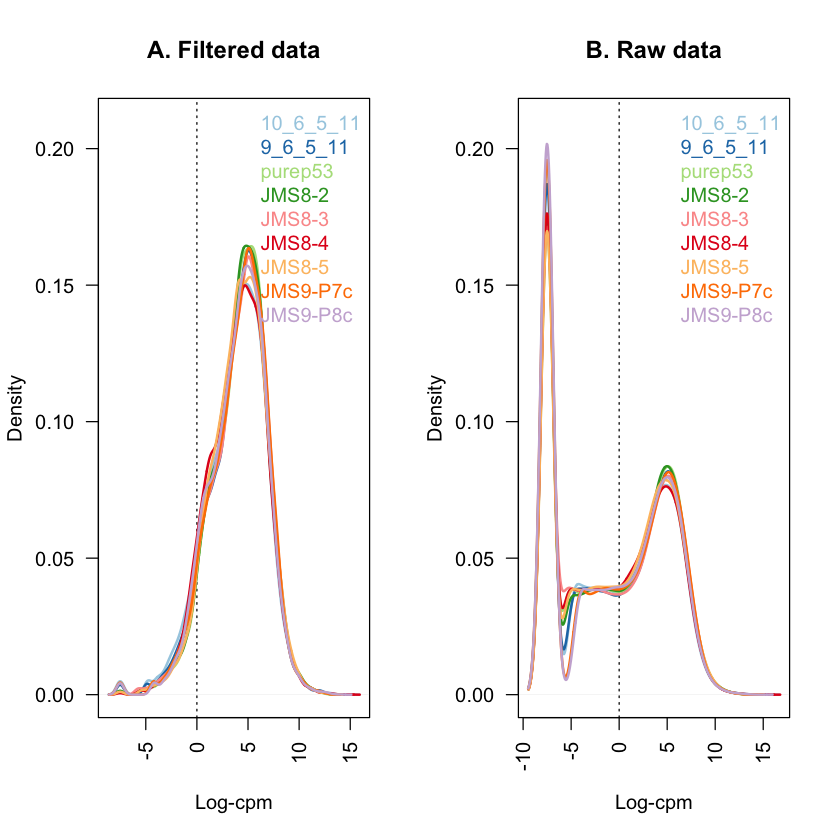

In [14]:
xLogCPMfiltered = cpm(x, log = T)

nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")

par(mfrow=c(1,2))

plot(density(xLogCPMfiltered[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="A. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(xLogCPMfiltered[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

plot(density(xLogCPM[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="B. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(xLogCPM[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

In [15]:
x <- calcNormFactors(x, method = "TMM")
x$samples

files                    group lib.size norm.factors lane
10_6_5_11 GSM1545535_10_6_5_11.txt LP    32832881 0.8957309    L004
9_6_5_11  GSM1545536_9_6_5_11.txt  ML    35296067 1.0349196    L004
purep53   GSM1545538_purep53.txt   Basal 57089259 1.0439552    L004
JMS8-2    GSM1545539_JMS8-2.txt    Basal 51304051 1.0405040    L006
JMS8-3    GSM1545540_JMS8-3.txt    ML    75724862 1.0323599    L006
JMS8-4    GSM1545541_JMS8-4.txt    LP    60457787 0.9223424    L006
JMS8-5    GSM1545542_JMS8-5.txt    Basal 55014064 0.9836603    L006
JMS9-P7c  GSM1545544_JMS9-P7c.txt  ML    21282257 1.0827381    L008
JMS9-P8c  GSM1545545_JMS9-P8c.txt  LP    19938942 0.9792607    L008

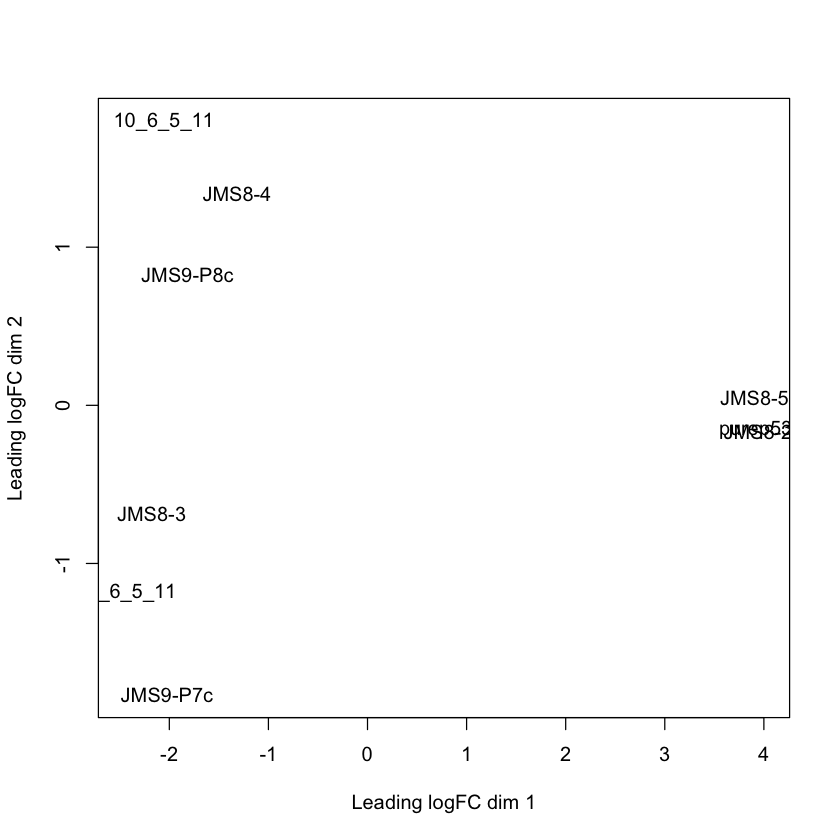

In [16]:
par(bg="white")
plotMDS(x) # Three distinct groups (LP/ML/Basal)

In [17]:
design <- model.matrix(~0+group+lane)
colnames(design) <- gsub("group", "", colnames(design))
design

Basal LP ML laneL006 laneL008
1 0     1  0  0        0       
2 0     0  1  0        0       
3 1     0  0  0        0       
4 1     0  0  1        0       
5 0     0  1  1        0       
6 0     1  0  1        0       
7 1     0  0  1        0       
8 0     0  1  0        1       
9 0     1  0  0        1

In [18]:
contr.matrix <- makeContrasts(
   BasalvsLP = Basal-LP, 
   BasalvsML = Basal - ML, 
   LPvsML = LP - ML, 
   levels = colnames(design))
contr.matrix

Contrasts
Levels     BasalvsLP BasalvsML LPvsML
  Basal     1         1         0    
  LP       -1         0         1    
  ML        0        -1        -1    
  laneL006  0         0         0    
  laneL008  0         0         0

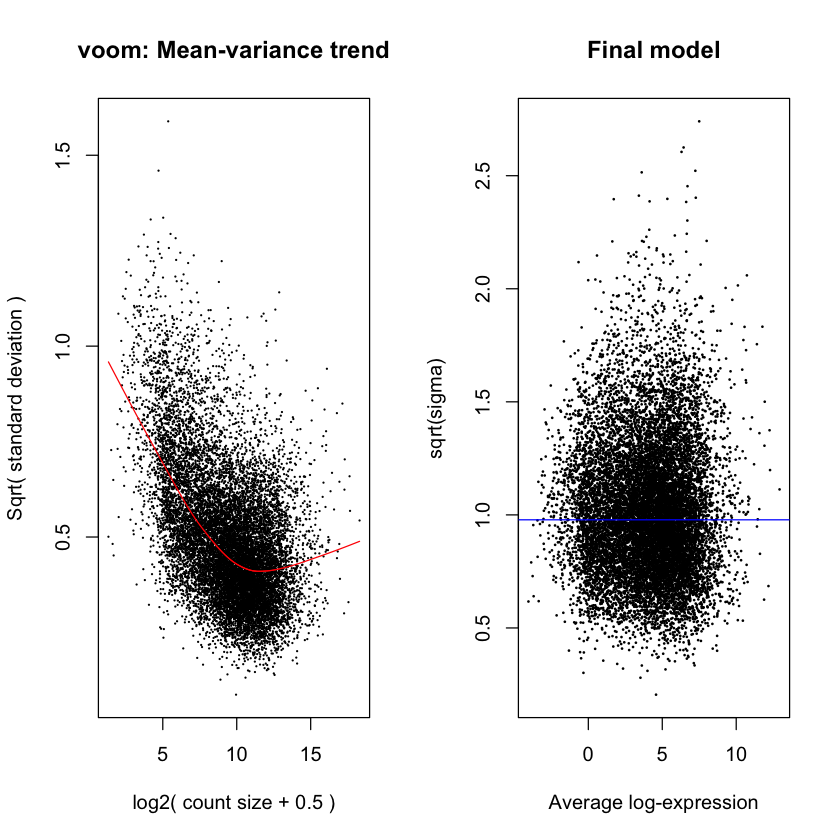

In [19]:
par(mfrow=c(1,2), bg="white")
v <- voom(x, design, plot=TRUE)
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit, main="Final model")

In [20]:
v

An object of class "EList"
$genes
   ENTREZID SYMBOL TXCHROM
1    497097   Xkr4    chr1
6     27395 Mrpl15    chr1
7     18777 Lypla1    chr1
9     21399  Tcea1    chr1
10    58175  Rgs20    chr1
14160 more rows ...

$targets
                             files group lib.size norm.factors lane
10_6_5_11 GSM1545535_10_6_5_11.txt    LP 29409426    0.8957309 L004
9_6_5_11   GSM1545536_9_6_5_11.txt    ML 36528591    1.0349196 L004
purep53     GSM1545538_purep53.txt Basal 59598629    1.0439552 L004
JMS8-2       GSM1545539_JMS8-2.txt Basal 53382070    1.0405040 L006
JMS8-3       GSM1545540_JMS8-3.txt    ML 78175314    1.0323599 L006
JMS8-4       GSM1545541_JMS8-4.txt    LP 55762781    0.9223424 L006
JMS8-5       GSM1545542_JMS8-5.txt Basal 54115150    0.9836603 L006
JMS9-P7c   GSM1545544_JMS9-P7c.txt    ML 23043111    1.0827381 L008
JMS9-P8c   GSM1545545_JMS9-P8c.txt    LP 19525423    0.9792607 L008

$E
        Samples
Tags     10_6_5_11  9_6_5_11   purep53    JMS8-2    JMS8-3    JMS8-4    JMS8-5
  497097 -4.293244 -3.869026  2.522753  3.302006 -4.481286 -3.993876  3.306782
  27395   3.875010  4.400568  4.521172  4.570624  4.322845  3.786547  3.918878
  18777   4.707695  5.559334  5.400569  5.171235  5.627798  5.081794  5.080061
  21399   4.784462  4.741999  5.374548  5.130925  4.848030  4.944024  5.158292
  58175   3.943567  3.294875 -1.767924 -1.880302  2.993289  3.357379 -2.114104
        Samples
Tags      JMS9-P7c  JMS9-P8c
  497097 -3.204336 -5.287282
  27395   4.345642  4.132678
  18777   5.757404  5.150470
  21399   5.036933  4.987679
  58175   3.142621  3.523290
14160 more rows ...

$weights
          [,1]      [,2]      [,3]     [,4]      [,5]      [,6]      [,7]
[1,]  1.183974  1.183974 20.526779 20.97747  1.773562  1.217142 21.125740
[2,] 20.879554 26.561871 31.596323 29.66102 32.558344 26.745293 29.792090
[3,] 28.003202 33.695540 34.845507 34.45673 35.148529 33.550527 34.517259
[4,] 27.670233 29.595778 34.901302 34.43298 34.841349 33.159425 34.493456
[5,] 19.737381 18.658333  3.184207  2.62986 24.191635 24.014937  2.648747
          [,8]      [,9]
[1,]  1.183974  1.183974
[2,] 21.900102 17.150677
[3,] 31.440457 25.228325
[4,] 26.136796 24.502247
[5,] 13.149278 14.351930
14160 more rows ...

$design
  Basal LP ML laneL006 laneL008
1     0  1  0        0        0
2     0  0  1        0        0
3     1  0  0        0        0
4     1  0  0        1        0
5     0  0  1        1        0
6     0  1  0        1        0
7     1  0  0        1        0
8     0  0  1        0        1
9     0  1  0        0        1
attr(,"assign")
[1] 1 1 1 2 2
attr(,"contrasts")
attr(,"contrasts")$group
[1] "contr.treatment"

attr(,"contrasts")$lane
[1] "contr.treatment"

In [21]:
summary(decideTests(efit))

       BasalvsLP BasalvsML LPvsML
Down        4127      4338   2895
NotSig      5740      5655   8825
Up          4298      4172   2445

In [22]:
tfit <- treat(vfit, lfc=1)
dt <- decideTests(tfit)
summary(dt)

       BasalvsLP BasalvsML LPvsML
Down        1417      1512    203
NotSig     11030     10895  13780
Up          1718      1758    182

In [23]:
de.common <- which(dt[,1]!=0 & dt[,2]!=0)
length(de.common)

[1] 2409

In [24]:
head(tfit$genes$SYMBOL[de.common], n=20)

[1] "Xkr4"          "Rgs20"         "Cpa6"          "Sulf1"        
 [5] "Eya1"          "Msc"           "Sbspon"        "Pi15"         
 [9] "Crispld1"      "Kcnq5"         "Ptpn18"        "Arhgef4"      
[13] "2010300C02Rik" "Aff3"          "Npas2"         "Tbc1d8"       
[17] "Creg2"         "Il1r1"         "Il18r1"        "Il18rap"

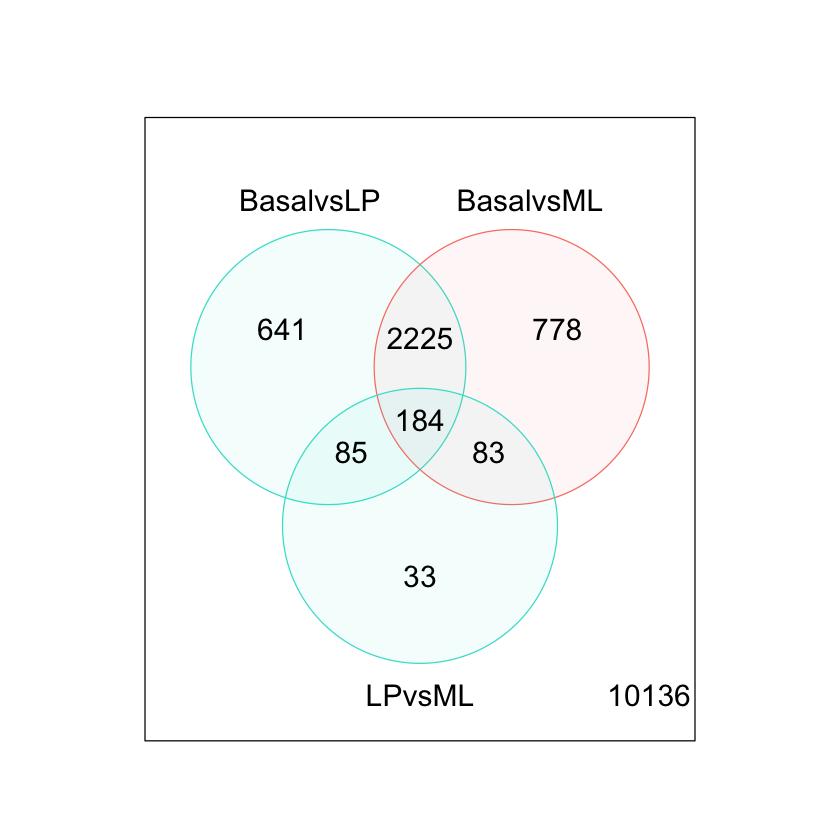

In [25]:
vennDiagram(dt[,1:3], circle.col=c("turquoise", "salmon"))

In [26]:
basal.vs.lp <- topTreat(tfit, coef=1, n=Inf)
basal.vs.ml <- topTreat(tfit, coef=2, n=Inf)
head(basal.vs.lp)

ENTREZID SYMBOL TXCHROM logFC     AveExpr  t         P.Value     
12759  12759    Clu    chr14   -5.442877 8.857907 -33.44429 3.990899e-10
53624  53624    Cldn7  chr11   -5.514605 6.296762 -32.94533 4.503694e-10
242505 242505   Rasef  chr4    -5.921741 5.119585 -31.77625 6.063249e-10
67451  67451    Pkp2   chr16   -5.724823 4.420495 -30.65370 8.010456e-10
228543 228543   Rhov   chr2    -6.253427 5.486640 -29.46244 1.112729e-09
70350  70350    Basp1  chr15   -6.073297 5.248349 -28.64890 1.380545e-09
       adj.P.Val   
12759  2.703871e-06
53624  2.703871e-06
242505 2.703871e-06
67451  2.703871e-06
228543 2.703871e-06
70350  2.703871e-06

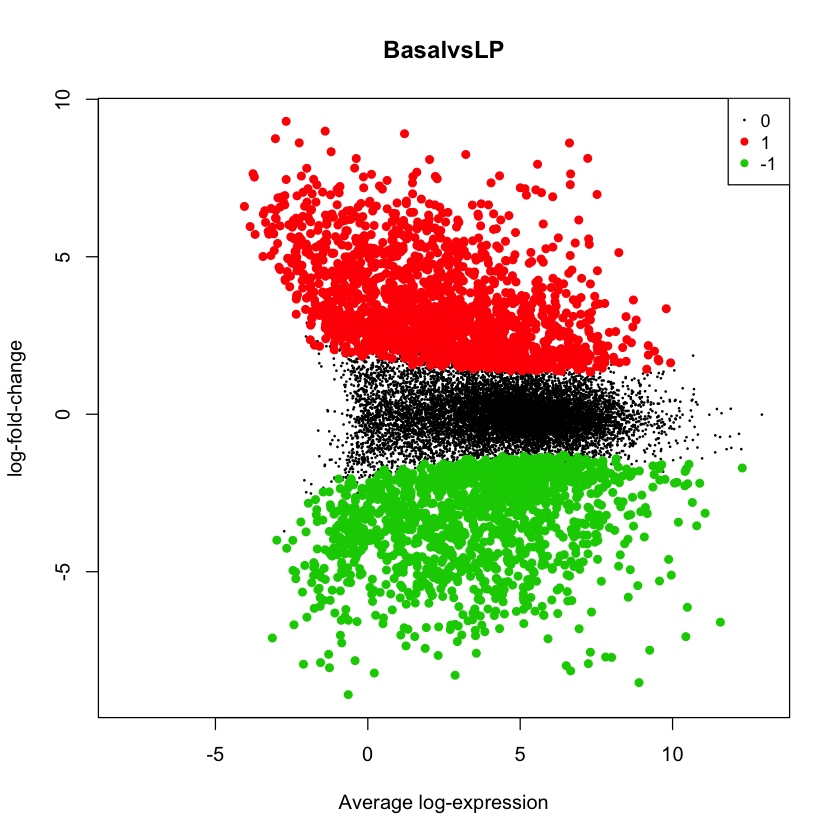

In [27]:
par(bg="white")
plotMD(tfit, column=1, status=dt[,1], main=colnames(tfit)[1], 
       xlim=c(-8,13))

In [28]:
basal.vs.lp.topgenes <- basal.vs.lp$ENTREZID[1:100]
i <- which(v$genes$ENTREZID %in% basal.vs.lp.topgenes)
mycol <- colorRampPalette(c("blue","white","red"))(1000)
# d3heatmap(v$E[i,], scale="row",
#    labRow=v$genes$SYMBOL[i], labCol=group, 
#    col=mycol, trace="none", density.info="none", 
#    margin=c(8,6), lhei=c(2,10))

## RecArg1 effect analysis

In [29]:
setwd("/Users/lvulliard/OneShotProject/RecArg1/counts")

### Counts with multi-mapping reads

In [30]:
countMat = matrix(nrow=26301, ncol=28)
colnames(countMat) <- list.files()
for (i in 1:28) {
    load(colnames(countMat)[i])
    countMat[,i] <- fcMulti$counts
}
rownames(countMat) <- rownames(fcMulti$counts)
# Four replicates of seven different conditions
conditionList = c(5,6,7,1,1,2,2,3,3,4,4,5,1,7,5,2,3,4,6,7,7,1,2,4,5,6,3,6)
# If s06 is Control RANKL rescue and s08 is Control rescue
# conditionList = c(5,6,7,1,1,2,2,3,3,4,4,5,1,7,5,2,3,4,6,7,7,1,2,4,5,6,6,3)

In [31]:
# Convert to DGE object
dgeData = DGEList(counts = countMat, genes = rownames(countMat), group = conditionList)

In [32]:
dim(dgeData)

[1] 26301    28

In [33]:
names(dgeData)

[1] "counts"  "samples" "genes"

In [34]:
# Counts equal to 0 for all but 3 samples at most
table(rowSums(dgeData$counts==0)>=25)
# Counts equal to 0 for all sample
table(rowSums(dgeData$counts==0)==28)


FALSE  TRUE 
20211  6090 


FALSE  TRUE 
22439  3862 

In [35]:
dgeDataLogCPMUnfiltered = cpm(dgeData, log = T)

In [36]:
table(rowSums(dgeDataLogCPMUnfiltered > 0) > 3)


FALSE  TRUE 
13349 12952 

In [37]:
dgeData = dgeData[rowSums(dgeDataLogCPMUnfiltered > 0) > 3,, keep.lib.sizes=FALSE]
# dgeData = dgeData[rowSums(dgeData$counts==0)>=25,, keep.lib.sizes=FALSE]

3862 genes are never expressed, 6090 are not expressed in more than 3 conditions, so not even in all replicates of a single condition.

In [38]:
# Input gene annotation
genes <- select(Mus.musculus, keys=rownames(countMat), columns=c("SYMBOL", "TXCHROM"), 
                keytype="ENTREZID")
# Choose to keep only the first chromosome position of each gene
genes <- genes[!duplicated(genes$ENTREZID),]
head(genes)

dgeData$genes <- genes

'select()' returned 1:many mapping between keys and columns


ENTREZID  SYMBOL  TXCHROM
1 497097    Xkr4    chr1   
2 100503874 Gm19938 NA     
3 100038431 Gm10568 NA     
4 19888     Rp1     chr1   
5 20671     Sox17   chr1   
6 27395     Mrpl15  chr1

In [39]:
# Input sample annotation
dgeData$samples$aMEM = c(TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE)[conditionList]
dgeData$samples$aMEMwoLArg = c(FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE)[conditionList]
dgeData$samples$LArg = c(FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE)[conditionList]
dgeData$samples$recArg = c(FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE)[conditionList]
dgeData$samples$RANKL = c(FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE)[conditionList]
# dgeData$samples$mouse = c()
dgeData$samples

group lib.size  norm.factors aMEM  aMEMwoLArg LArg 
170227_s02.count       5      45677345 1            FALSE  TRUE      FALSE
170227_s04.count       6      45705829 1            FALSE  TRUE       TRUE
170227_s06.count       7      47512077 1             TRUE FALSE      FALSE
170227_s08.count       1      37819198 1             TRUE FALSE      FALSE
170227_s09.count       1      45890838 1             TRUE FALSE      FALSE
170227_s10.count       2      56610261 1            FALSE  TRUE      FALSE
170227_s11.count       2      41827445 1            FALSE  TRUE      FALSE
170227_s12.count       3      33793972 1            FALSE  TRUE       TRUE
170227_s13.count       3      39076984 1            FALSE  TRUE       TRUE
170227_s14.count       4      41639534 1             TRUE FALSE      FALSE
170227_s15.count       4      35824182 1             TRUE FALSE      FALSE
170227_s16.count       5      43145082 1            FALSE  TRUE      FALSE
170227_s33.count       1      60546377 1             TRUE FALSE      FALSE
170227_s35.count       7      38808983 1             TRUE FALSE      FALSE
170227_s36.count       5      74096909 1            FALSE  TRUE      FALSE
170227_s39.count       2      54880153 1            FALSE  TRUE      FALSE
170227_s41.count       3      65190678 1            FALSE  TRUE       TRUE
170227_s43.count       4     117494089 1             TRUE FALSE      FALSE
170227_s46.count       6      96070358 1            FALSE  TRUE       TRUE
170227_s48.count       7      83431045 1             TRUE FALSE      FALSE
170331_0038_s071.count 7      43930082 1             TRUE FALSE      FALSE
170331_0038_s073.count 1      53699619 1             TRUE FALSE      FALSE
170331_0038_s075.count 2      62022904 1            FALSE  TRUE      FALSE
170331_0038_s078.count 4      61413665 1             TRUE FALSE      FALSE
170331_0038_s080.count 5      99095417 1            FALSE  TRUE      FALSE
170331_0038_s082.count 6      53918449 1            FALSE  TRUE       TRUE
s06.count              3      66562588 1            FALSE  TRUE       TRUE
s08.count              6      62062477 1            FALSE  TRUE       TRUE
                       recArg RANKL
170227_s02.count       FALSE   TRUE
170227_s04.count       FALSE   TRUE
170227_s06.count        TRUE   TRUE
170227_s08.count       FALSE  FALSE
170227_s09.count       FALSE  FALSE
170227_s10.count       FALSE  FALSE
170227_s11.count       FALSE  FALSE
170227_s12.count       FALSE  FALSE
170227_s13.count       FALSE  FALSE
170227_s14.count       FALSE   TRUE
170227_s15.count       FALSE   TRUE
170227_s16.count       FALSE   TRUE
170227_s33.count       FALSE  FALSE
170227_s35.count        TRUE   TRUE
170227_s36.count       FALSE   TRUE
170227_s39.count       FALSE  FALSE
170227_s41.count       FALSE  FALSE
170227_s43.count       FALSE   TRUE
170227_s46.count       FALSE   TRUE
170227_s48.count        TRUE   TRUE
170331_0038_s071.count  TRUE   TRUE
170331_0038_s073.count FALSE  FALSE
170331_0038_s075.count FALSE  FALSE
170331_0038_s078.count FALSE   TRUE
170331_0038_s080.count FALSE   TRUE
170331_0038_s082.count FALSE   TRUE
s06.count              FALSE  FALSE
s08.count              FALSE   TRUE

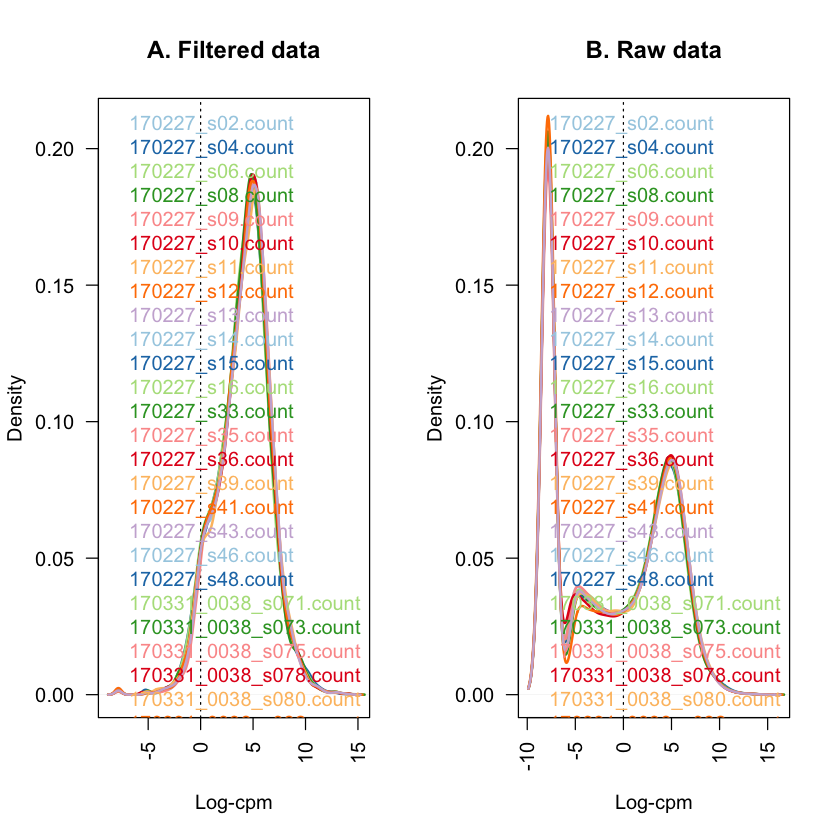

In [40]:
dgeDataLogCPM = cpm(dgeData, log = T)
# NB: prior count of 0.25

nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")

par(mfrow=c(1,2), bg="white")

plot(density(dgeDataLogCPM[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="A. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(dgeDataLogCPM[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", rownames(dgeData$samples), text.col=col, bty="n")

plot(density(dgeDataLogCPMUnfiltered[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="B. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(dgeDataLogCPMUnfiltered[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", rownames(dgeData$samples), text.col=col, bty="n")

In [41]:
dgeData <- calcNormFactors(dgeData, method = "TMM")
dgeData$samples

group lib.size  norm.factors aMEM  aMEMwoLArg LArg 
170227_s02.count       5      45677345 0.9821400    FALSE  TRUE      FALSE
170227_s04.count       6      45705829 0.9497017    FALSE  TRUE       TRUE
170227_s06.count       7      47512077 0.9183712     TRUE FALSE      FALSE
170227_s08.count       1      37819198 0.9342552     TRUE FALSE      FALSE
170227_s09.count       1      45890838 1.0448981     TRUE FALSE      FALSE
170227_s10.count       2      56610261 0.9677719    FALSE  TRUE      FALSE
170227_s11.count       2      41827445 1.0232996    FALSE  TRUE      FALSE
170227_s12.count       3      33793972 0.9790287    FALSE  TRUE       TRUE
170227_s13.count       3      39076984 1.0308780    FALSE  TRUE       TRUE
170227_s14.count       4      41639534 1.0186578     TRUE FALSE      FALSE
170227_s15.count       4      35824182 1.0235932     TRUE FALSE      FALSE
170227_s16.count       5      43145082 0.9809821    FALSE  TRUE      FALSE
170227_s33.count       1      60546377 0.9453273     TRUE FALSE      FALSE
170227_s35.count       7      38808983 1.0294164     TRUE FALSE      FALSE
170227_s36.count       5      74096909 1.0669345    FALSE  TRUE      FALSE
170227_s39.count       2      54880153 0.9542249    FALSE  TRUE      FALSE
170227_s41.count       3      65190678 1.0275678    FALSE  TRUE       TRUE
170227_s43.count       4     117494089 1.0847921     TRUE FALSE      FALSE
170227_s46.count       6      96070358 1.0148838    FALSE  TRUE       TRUE
170227_s48.count       7      83431045 1.0334736     TRUE FALSE      FALSE
170331_0038_s071.count 7      43930082 0.9953840     TRUE FALSE      FALSE
170331_0038_s073.count 1      53699619 0.9508596     TRUE FALSE      FALSE
170331_0038_s075.count 2      62022904 0.9723899    FALSE  TRUE      FALSE
170331_0038_s078.count 4      61413665 1.0763952     TRUE FALSE      FALSE
170331_0038_s080.count 5      99095417 1.0324937    FALSE  TRUE      FALSE
170331_0038_s082.count 6      53918449 1.0820901    FALSE  TRUE       TRUE
s06.count              3      66562588 0.9664481    FALSE  TRUE       TRUE
s08.count              6      62062477 0.9440680    FALSE  TRUE       TRUE
                       recArg RANKL
170227_s02.count       FALSE   TRUE
170227_s04.count       FALSE   TRUE
170227_s06.count        TRUE   TRUE
170227_s08.count       FALSE  FALSE
170227_s09.count       FALSE  FALSE
170227_s10.count       FALSE  FALSE
170227_s11.count       FALSE  FALSE
170227_s12.count       FALSE  FALSE
170227_s13.count       FALSE  FALSE
170227_s14.count       FALSE   TRUE
170227_s15.count       FALSE   TRUE
170227_s16.count       FALSE   TRUE
170227_s33.count       FALSE  FALSE
170227_s35.count        TRUE   TRUE
170227_s36.count       FALSE   TRUE
170227_s39.count       FALSE  FALSE
170227_s41.count       FALSE  FALSE
170227_s43.count       FALSE   TRUE
170227_s46.count       FALSE   TRUE
170227_s48.count        TRUE   TRUE
170331_0038_s071.count  TRUE   TRUE
170331_0038_s073.count FALSE  FALSE
170331_0038_s075.count FALSE  FALSE
170331_0038_s078.count FALSE   TRUE
170331_0038_s080.count FALSE   TRUE
170331_0038_s082.count FALSE   TRUE
s06.count              FALSE  FALSE
s08.count              FALSE   TRUE

In [42]:
library(d3heatmap)
sampleLabels = paste0("s", 1:28, "_", conditionList)
d3heatmap(cor(dgeData$counts), theme = "dark", symm=T, labRow = sampleLabels, labCol = sampleLabels)

HTML widgets cannot be represented in plain text (need html)

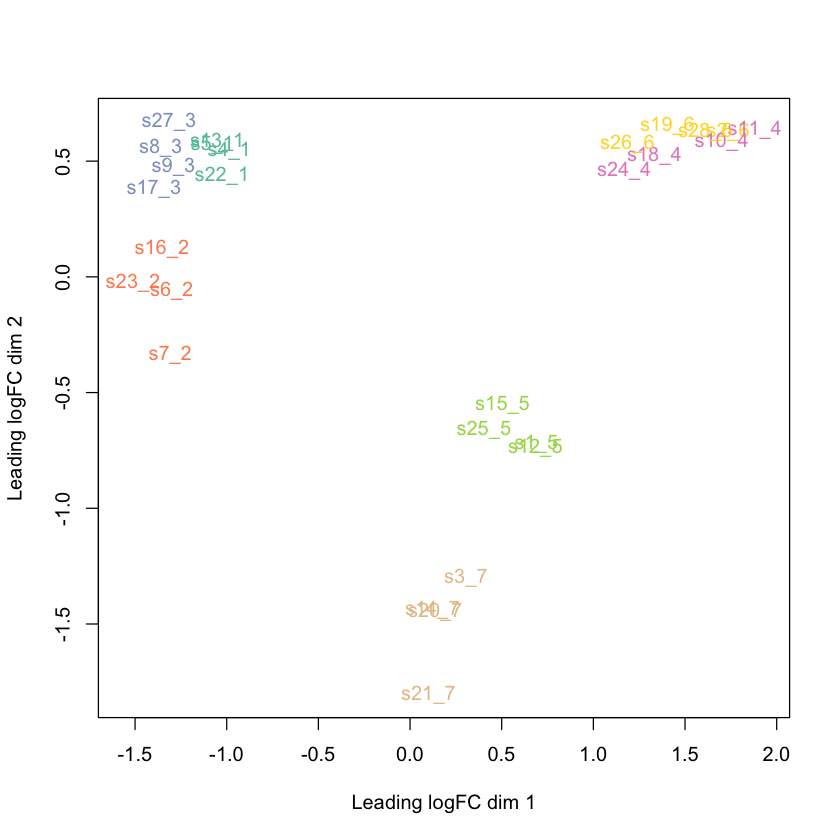

In [43]:
par(bg="white")
colpal = brewer.pal(7, "Set2")
plotMDS(dgeData, labels = sampleLabels, col = colpal[as.numeric(dgeData$samples$group)])

In [44]:
with(data.frame(dgeData$samples), tvr <- aMEM)

In [45]:
design <- with(data.frame(dgeData$samples), 
#    model.matrix(~0+aMEM+LArg+recArg+RANKL))
    model.matrix(~0+group))
design

group1 group2 group3 group4 group5 group6 group7
1  0      0      0      0      1      0      0     
2  0      0      0      0      0      1      0     
3  0      0      0      0      0      0      1     
4  1      0      0      0      0      0      0     
5  1      0      0      0      0      0      0     
6  0      1      0      0      0      0      0     
7  0      1      0      0      0      0      0     
8  0      0      1      0      0      0      0     
9  0      0      1      0      0      0      0     
10 0      0      0      1      0      0      0     
11 0      0      0      1      0      0      0     
12 0      0      0      0      1      0      0     
13 1      0      0      0      0      0      0     
14 0      0      0      0      0      0      1     
15 0      0      0      0      1      0      0     
16 0      1      0      0      0      0      0     
17 0      0      1      0      0      0      0     
18 0      0      0      1      0      0      0     
19 0      0      0      0      0      1      0     
20 0      0      0      0      0      0      1     
21 0      0      0      0      0      0      1     
22 1      0      0      0      0      0      0     
23 0      1      0      0      0      0      0     
24 0      0      0      1      0      0      0     
25 0      0      0      0      1      0      0     
26 0      0      0      0      0      1      0     
27 0      0      1      0      0      0      0     
28 0      0      0      0      0      1      0

In [46]:
contr.matrix <- makeContrasts(
                        g1v2 = group1 - group2,
                        g1v3 = group1 - group3,
                        g1v4 = group1 - group4,
                        g2v3 = group2 - group3,
                        g2v5 = group2 - group5,
                        g3v6 = group3 - group6,
                        g4v5 = group4 - group5,
                        g4v6 = group4 - group6,
                        g4v7 = group4 - group7,
                        g5v7 = group5 - group7,
                        rankl = group6 + group5 + group4 - group3 - group2 - group1,
                        arg = group1 + group4 - group5 - group2,
                        rescue = group1 + group4 - group6 - group3,
                        levels = colnames(design))
contr.matrix

Contrasts
Levels   g1v2 g1v3 g1v4 g2v3 g2v5 g3v6 g4v5 g4v6 g4v7 g5v7 rankl arg rescue
  group1  1    1    1    0    0    0    0    0    0    0   -1     1   1    
  group2 -1    0    0    1    1    0    0    0    0    0   -1    -1   0    
  group3  0   -1    0   -1    0    1    0    0    0    0   -1     0  -1    
  group4  0    0   -1    0    0    0    1    1    1    0    1     1   1    
  group5  0    0    0    0   -1    0   -1    0    0    1    1    -1   0    
  group6  0    0    0    0    0   -1    0   -1    0    0    1     0  -1    
  group7  0    0    0    0    0    0    0    0   -1   -1    0     0   0

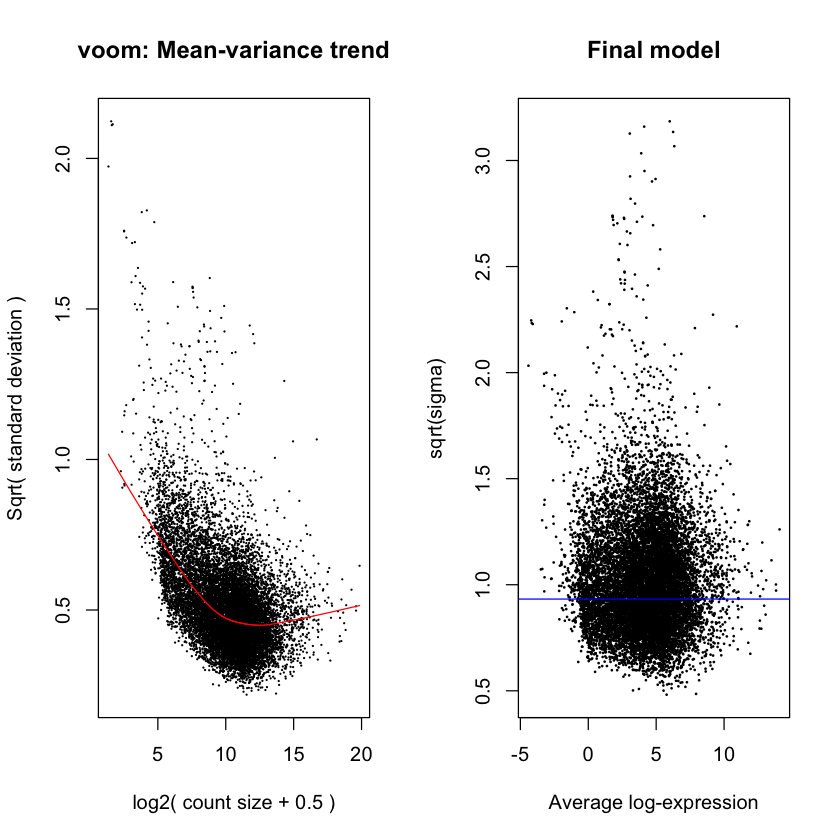

In [47]:
par(mfrow=c(1,2), bg="white")
v <- voom(dgeData, design, plot=TRUE)
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit, main="Final model")

In [48]:
v

An object of class "EList"
$genes
   ENTREZID  SYMBOL TXCHROM
1    497097    Xkr4    chr1
2 100503874 Gm19938    <NA>
3 100038431 Gm10568    <NA>
4     19888     Rp1    chr1
5     20671   Sox17    chr1
26296 more rows ...

$targets
                 group lib.size norm.factors  aMEM aMEMwoLArg  LArg recArg
170227_s02.count     5 44861547    0.9821400 FALSE       TRUE FALSE  FALSE
170227_s04.count     6 43406902    0.9497017 FALSE       TRUE  TRUE  FALSE
170227_s06.count     7 43633725    0.9183712  TRUE      FALSE FALSE   TRUE
170227_s08.count     1 35332784    0.9342552  TRUE      FALSE FALSE  FALSE
170227_s09.count     1 47951248    1.0448981  TRUE      FALSE FALSE  FALSE
                 RANKL
170227_s02.count  TRUE
170227_s04.count  TRUE
170227_s06.count  TRUE
170227_s08.count FALSE
170227_s09.count FALSE
23 more rows ...

$E
          170227_s02.count 170227_s04.count 170227_s06.count 170227_s08.count
27395             5.548423         6.285727         5.545213         5.340376
18777             5.984014         5.636629         6.028615         5.723957
100503730         4.520321         4.384311         4.623420         4.353918
21399             7.757477         7.423075         7.819488         6.845927
58175             1.562441         1.554501         1.851836         1.805432
          170227_s09.count 170227_s10.count 170227_s11.count 170227_s12.count
27395             4.948372         5.242122         5.027993         5.175281
18777             5.708538         5.889827         5.816707         5.882990
100503730         3.518479         4.369565         3.947808         4.310534
21399             6.913732         7.068092         7.383213         6.923247
58175             1.943981         1.603648         2.970562         1.852750
          170227_s13.count 170227_s14.count 170227_s15.count 170227_s16.count
27395             4.988116         5.809891         6.094378         5.572067
18777             5.816038         5.537794         5.610448         5.441675
100503730         3.617706         3.741925         3.878975         3.305661
21399             6.906433         7.258673         7.374419         7.278584
58175             1.822697         1.696736         2.037115         1.858672
          170227_s33.count 170227_s35.count 170227_s36.count 170227_s39.count
27395             5.167121         4.966990         5.438128         5.201153
18777             5.766856         5.944590         5.693248         5.572185
100503730         3.843262         3.897812         3.648656         3.741627
21399             6.896384         7.421006         7.469408         6.719969
58175             2.003496         2.024151         2.853797         1.513388
          170227_s41.count 170227_s43.count 170227_s46.count 170227_s48.count
27395             4.997905         5.662897         6.029177         5.142923
18777             5.644764         5.459022         5.270525         5.815093
100503730         3.557140         3.403277         3.357729         3.663404
21399             6.917790         7.298782         7.165238         7.484138
58175             3.067315         2.557845         1.910335         2.728596
          170331_0038_s071.count 170331_0038_s073.count 170331_0038_s075.count
27395                   5.059807               5.062681               4.902248
18777                   5.948548               5.857481               5.879064
100503730               3.993517               3.967004               3.859627
21399                   7.812293               7.142140               6.989452
58175                   3.536802               3.166634               3.038405
          170331_0038_s078.count 170331_0038_s080.count 170331_0038_s082.count
27395                   5.512920               5.256627               5.450037
18777                   5.757234               5.643498               5.594696
100503730               3.645920               3.618315               3.554485
21399                   7.429

In [49]:
summary(decideTests(efit))

        g1v2  g1v3  g1v4  g2v3  g2v5  g3v6  g4v5  g4v6  g4v7  g5v7 rankl   arg
Down     442   159  2174    26  1406  3079  1480    93  2694   733  3742  1579
NotSig 12231 12652  8301 12814  9832  6625 10357 12724  7563 11061  5617 10211
Up       279   141  2477   112  1714  3248  1115   135  2695  1158  3593  1162
       rescue
Down      229
NotSig  12439
Up        284

In [50]:
tfit <- treat(vfit, lfc=1)
dt <- decideTests(tfit)
summary(dt)

        g1v2  g1v3  g1v4  g2v3  g2v5  g3v6  g4v5  g4v6  g4v7  g5v7 rankl   arg
Down      22     3   215     0   107   290    80     1   150    10  1642   172
NotSig 12919 12944 12488 12945 12723 12253 12802 12951 12532 12866  9988 12667
Up        11     5   249     7   122   409    70     0   270    76  1322   113
       rescue
Down       13
NotSig  12911
Up         28

In [51]:
de.common <- which(dt[,1]!=0 & dt[,2]!=0)
length(de.common)

[1] 7

In [52]:
head(tfit$genes$SYMBOL[de.common], n=20)

[1] "4930558J18Rik" "Olfr826"       "Psmb11"        "Mycbp2"       
[5] "Adsl"          "Kdm3b"         "Tmem151a"

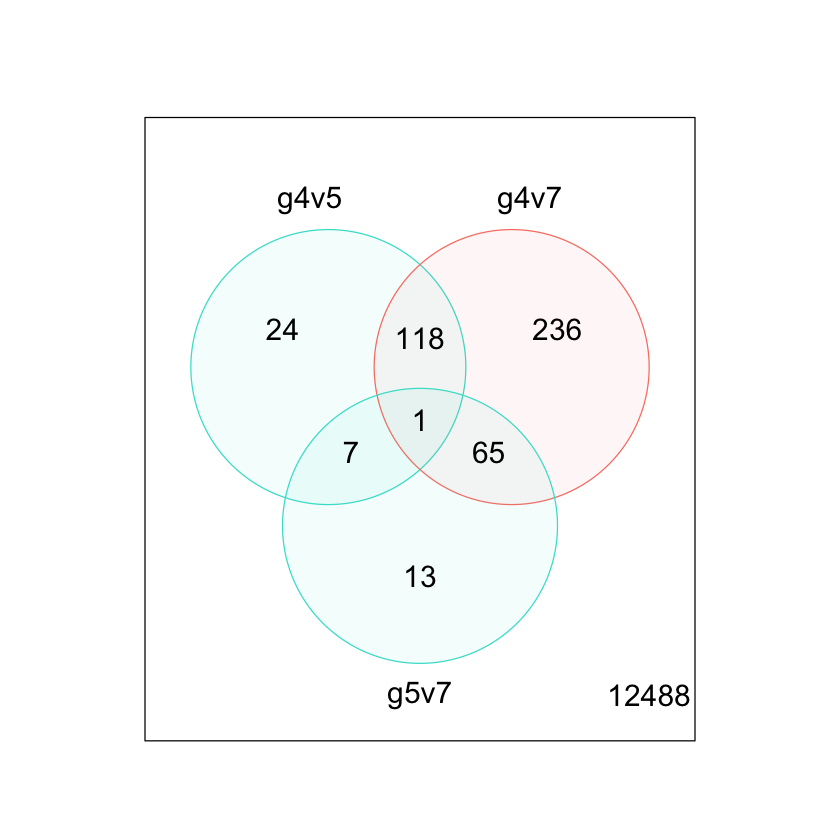

In [53]:
par(bg = "white")
vennDiagram(dt[,c(7,9,10)], circle.col=c("turquoise", "salmon"))

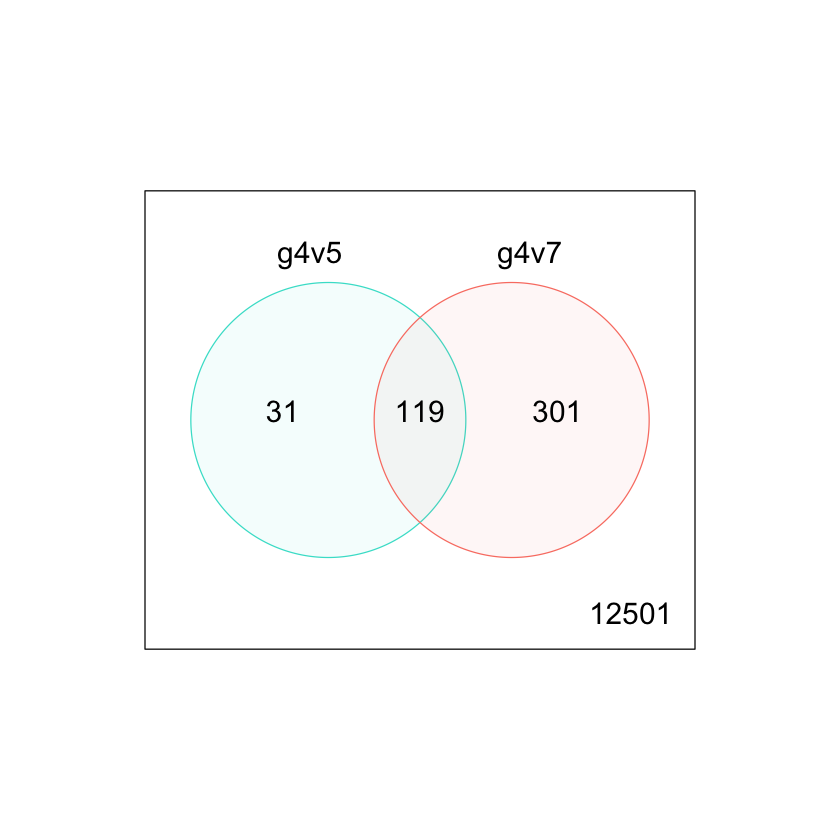

In [54]:
par(bg = "white")
vennDiagram(dt[,c(7,9)], circle.col=c("turquoise", "salmon"))

Adding recArg1 modified more gene expressions than lack of arginine.  
Most of the genes perturbed by lack of arginine are also perturbed by recArg1.  
Looking at the difference between arg$^-$ and recArg1$^+$ samples doesn't show additional information,

### Effect of RANKL

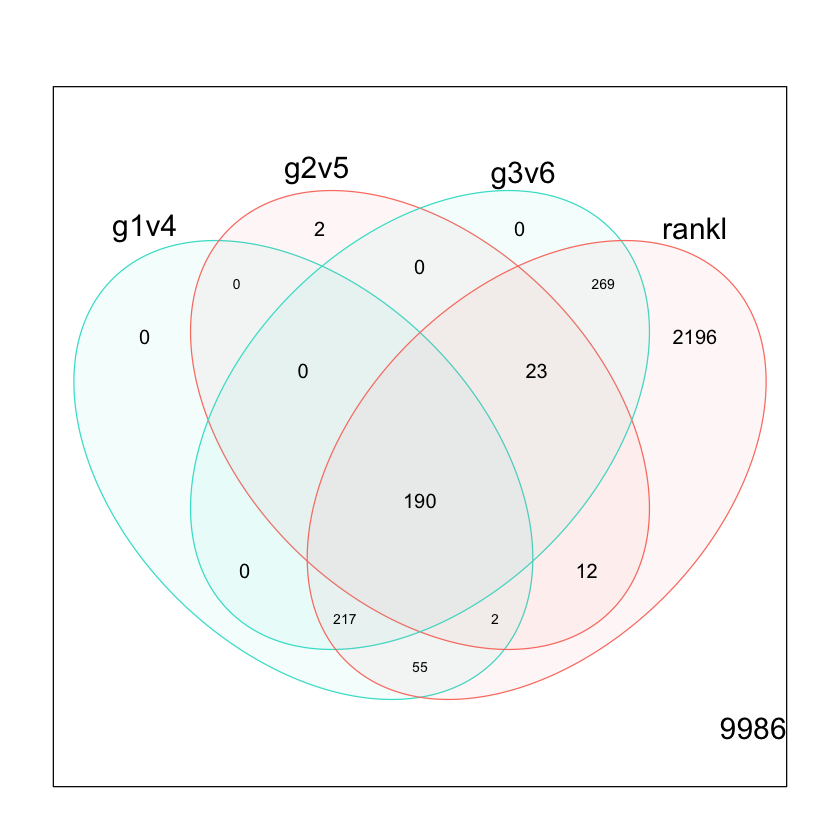

In [55]:
par(bg = "white")
vennDiagram(dt[,c(3,5,6,11)], circle.col=c("turquoise", "salmon"))

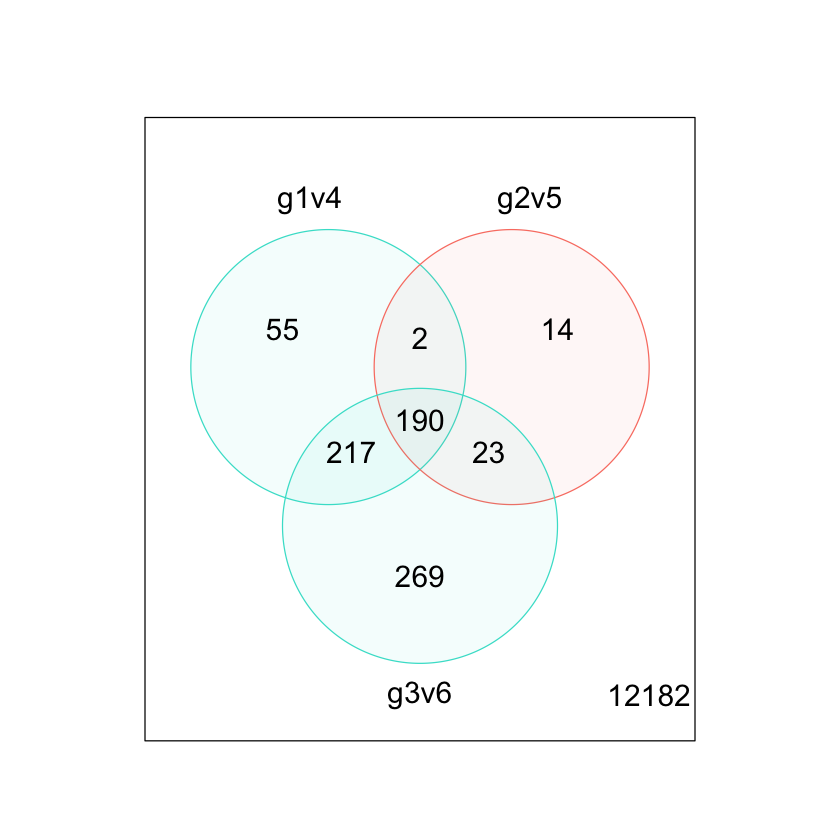

In [56]:
par(bg = "white")
vennDiagram(dt[,c(3,5,6)], circle.col=c("turquoise", "salmon"))

### Effect of arginin depletion

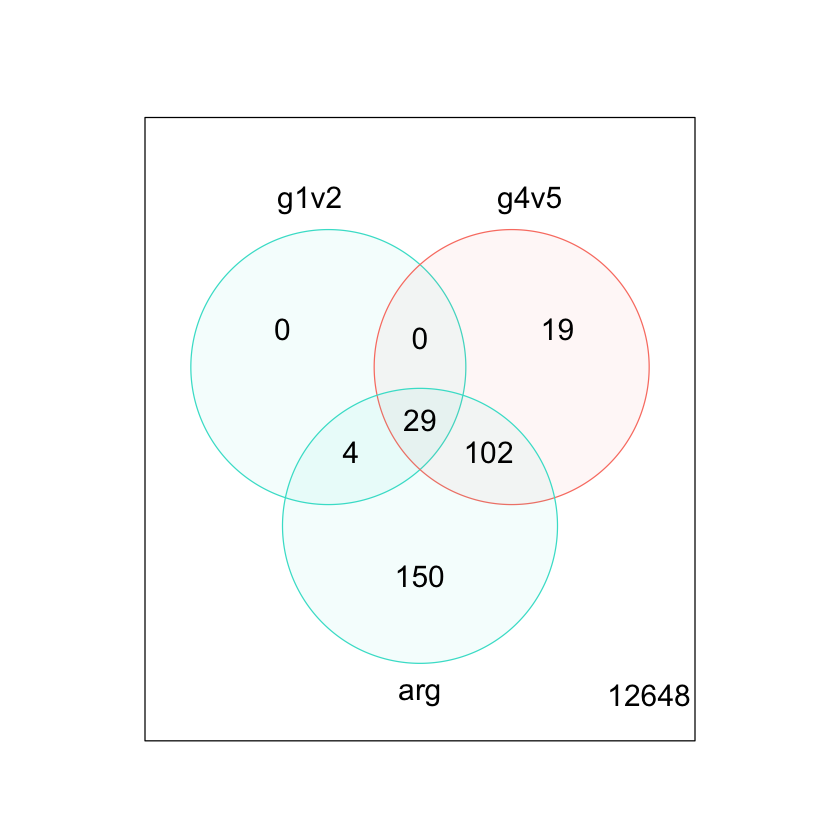

In [57]:
par(bg = "white")
vennDiagram(dt[,c(1,7,12)], circle.col=c("turquoise", "salmon"))

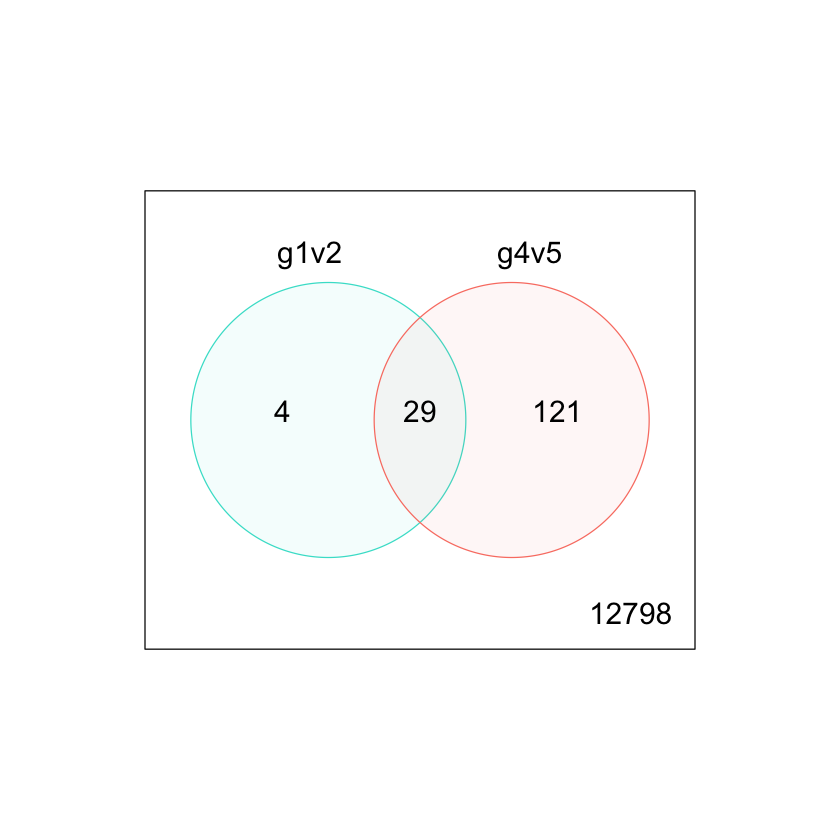

In [58]:
par(bg = "white")
vennDiagram(dt[,c(1,7)], circle.col=c("turquoise", "salmon"))

### Effect of arginin rescue

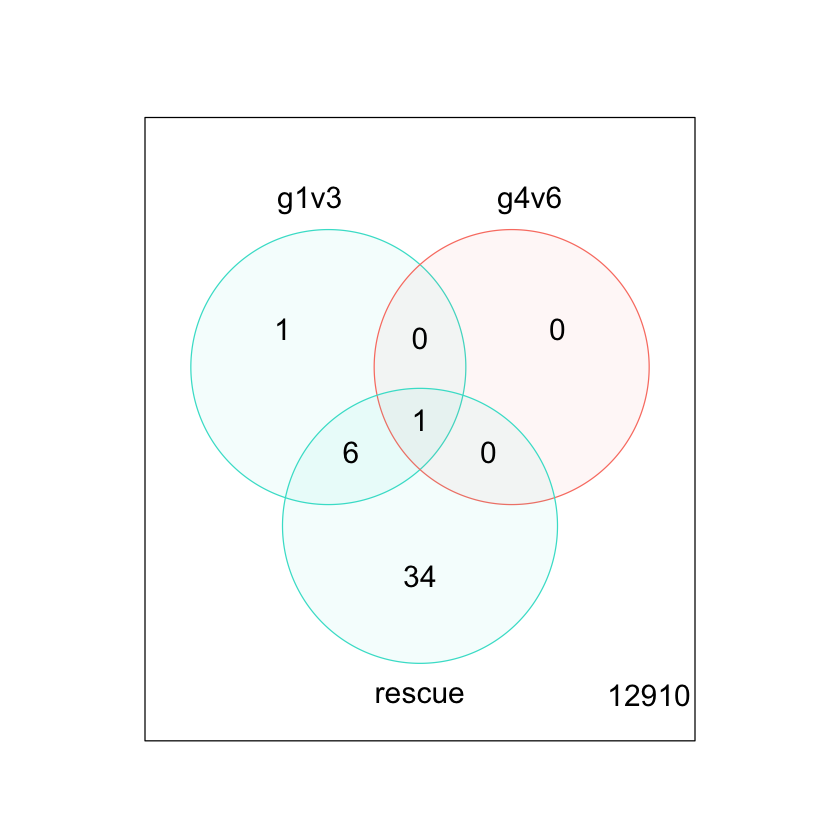

In [59]:
par(bg = "white")
vennDiagram(dt[,c(2,8,13)], circle.col=c("turquoise", "salmon"))

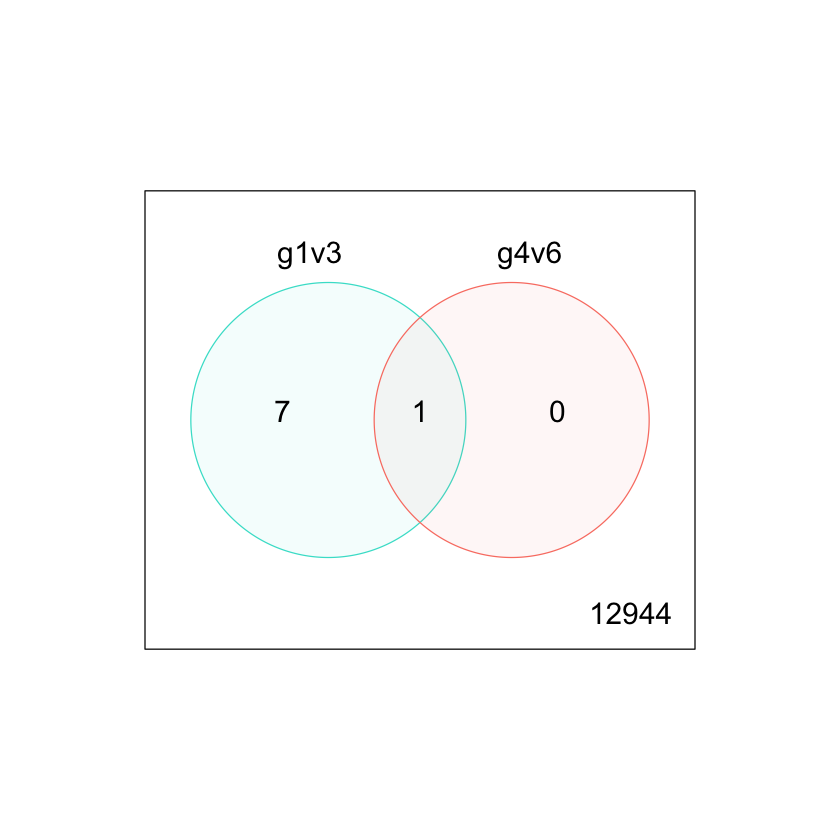

In [60]:
par(bg = "white")
vennDiagram(dt[,c(2,8)], circle.col=c("turquoise", "salmon"))

In [61]:
top4v5 <- topTreat(tfit, coef=7, n=Inf)
top4v7 <- topTreat(tfit, coef=9, n=Inf)
head(top4v7)

ENTREZID SYMBOL  TXCHROM logFC     AveExpr   t         P.Value     
81703  268390   Ahsa2   chr11    3.714123 5.9306404  17.81501 7.612329e-16
69065  218914   Wapl    chr14   -5.565106 1.4285436 -15.49695 1.777925e-14
16918  170787   Hdac10  chr15    5.162241 1.5747943  13.97476 1.751572e-13
18654  53625    B3gnt2  chr11    5.449728 0.2153516  13.41876 4.244791e-13
238161 258672   Olfr825 chr10    5.310095 1.1955091  12.93304 9.415107e-13
55963  215821   Arfgef3 chr10   -4.164121 1.6880897 -12.03294 4.380609e-12
       adj.P.Val   
81703  9.859488e-12
69065  1.151384e-10
16918  7.562119e-10
18654  1.374463e-09
238161 2.438889e-09
55963  8.281716e-09

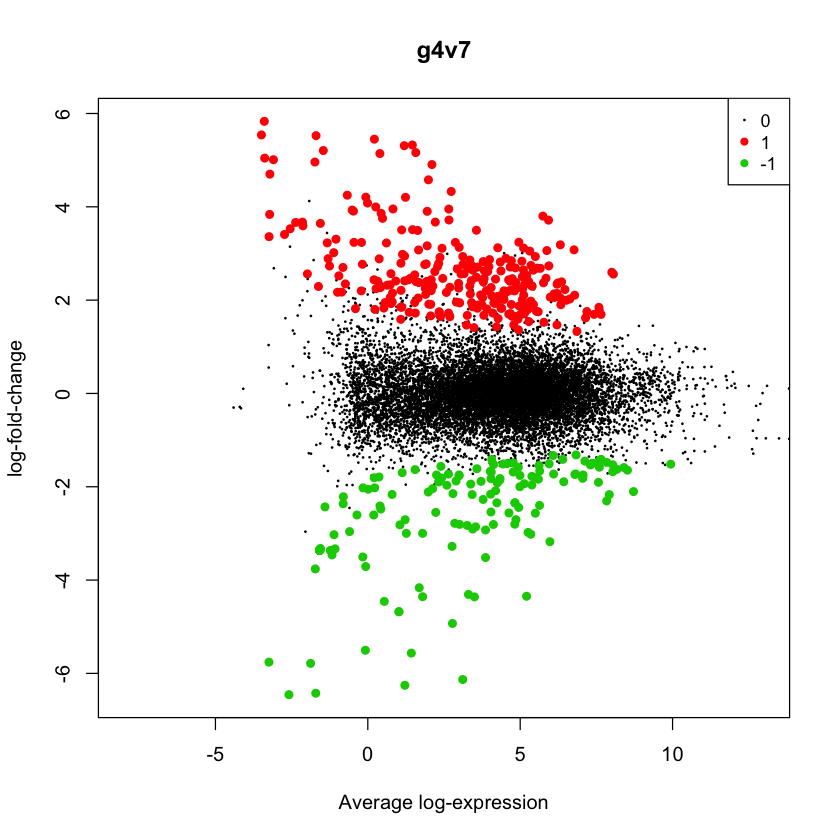

In [62]:
par(bg="white")
plotMD(tfit, column=9, status=dt[,9], main=colnames(tfit)[9], 
       xlim=c(-8,13))

In [63]:
top4v7.topgenes <- top4v7$ENTREZID[1:100]
i <- which(v$genes$ENTREZID %in% top4v7.topgenes)
mycol <- colorRampPalette(c("blue","white","red"))(1000)
# d3heatmap(v$E[i,], scale="row",
#    labRow=v$genes$SYMBOL[i], labCol=group, 
#    col=mycol, trace="none", density.info="none", 
#    margin=c(8,6), lhei=c(2,10))

### Counts without multi-mapping reads

In [64]:
list.files()

[1] "170227_s02.count"       "170227_s04.count"       "170227_s06.count"      
 [4] "170227_s08.count"       "170227_s09.count"       "170227_s10.count"      
 [7] "170227_s11.count"       "170227_s12.count"       "170227_s13.count"      
[10] "170227_s14.count"       "170227_s15.count"       "170227_s16.count"      
[13] "170227_s33.count"       "170227_s35.count"       "170227_s36.count"      
[16] "170227_s39.count"       "170227_s41.count"       "170227_s43.count"      
[19] "170227_s46.count"       "170227_s48.count"       "170331_0038_s071.count"
[22] "170331_0038_s073.count" "170331_0038_s075.count" "170331_0038_s078.count"
[25] "170331_0038_s080.count" "170331_0038_s082.count" "s06.count"             
[28] "s08.count"

In [65]:
countMat = matrix(nrow=26301, ncol=28)
colnames(countMat) <- list.files()
for (i in 1:28) {
    load(colnames(countMat)[i])
    countMat[,i] <- fcStrict$counts
}
rownames(countMat) <- rownames(fcStrict$counts)
# Four replicates of seven different conditions
conditionList = c(5,6,7,1,1,2,2,3,3,4,4,5,1,7,5,2,3,4,6,7,7,1,2,4,5,6,3,6)
# If s06 is Control RANKL rescue and s08 is Control rescue
# conditionList = c(5,6,7,1,1,2,2,3,3,4,4,5,1,7,5,2,3,4,6,7,7,1,2,4,5,6,6,3)

In [66]:
# Convert to DGE object
dgeData = DGEList(counts = countMat, genes = rownames(countMat), group = conditionList)

In [67]:
dim(dgeData)

[1] 26301    28

In [68]:
names(dgeData)

[1] "counts"  "samples" "genes"

In [69]:
# Counts equal to 0 for all but 3 samples at most
table(rowSums(dgeData$counts==0)>=25)
# Counts equal to 0 for all sample
table(rowSums(dgeData$counts==0)==28)


FALSE  TRUE 
19034  7267 


FALSE  TRUE 
21291  5010 

In [70]:
dgeDataLogCPMUnfiltered = cpm(dgeData, log = T)

In [71]:
table(rowSums(dgeDataLogCPMUnfiltered > 0) > 3)


FALSE  TRUE 
14370 11931 

In [72]:
dgeData = dgeData[rowSums(dgeDataLogCPMUnfiltered > 0) > 3,, keep.lib.sizes=FALSE]
# dgeData = dgeData[rowSums(dgeData$counts==0)>=25,, keep.lib.sizes=FALSE]

3862 genes are never expressed, 6090 are not expressed in more than 3 conditions, so not even in all replicates of a single condition.

In [73]:
# Input gene annotation
genes <- select(Mus.musculus, keys=rownames(countMat), columns=c("SYMBOL", "TXCHROM"), 
                keytype="ENTREZID")
# Choose to keep only the first chromosome position of each gene
genes <- genes[!duplicated(genes$ENTREZID),]
head(genes)

dgeData$genes <- genes

'select()' returned 1:many mapping between keys and columns


ENTREZID  SYMBOL  TXCHROM
1 497097    Xkr4    chr1   
2 100503874 Gm19938 NA     
3 100038431 Gm10568 NA     
4 19888     Rp1     chr1   
5 20671     Sox17   chr1   
6 27395     Mrpl15  chr1

In [74]:
# Input sample annotation
dgeData$samples$aMEM = c(TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE)[conditionList]
dgeData$samples$aMEMwoLArg = c(FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE)[conditionList]
dgeData$samples$LArg = c(FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE)[conditionList]
dgeData$samples$recArg = c(FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE)[conditionList]
dgeData$samples$RANKL = c(FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE)[conditionList]
# dgeData$samples$mouse = c()
dgeData$samples

group lib.size norm.factors aMEM  aMEMwoLArg LArg 
170227_s02.count       5     34955899 1            FALSE  TRUE      FALSE
170227_s04.count       6     34429660 1            FALSE  TRUE       TRUE
170227_s06.count       7     35839059 1             TRUE FALSE      FALSE
170227_s08.count       1     28173803 1             TRUE FALSE      FALSE
170227_s09.count       1     35708124 1             TRUE FALSE      FALSE
170227_s10.count       2     43244287 1            FALSE  TRUE      FALSE
170227_s11.count       2     33474537 1            FALSE  TRUE      FALSE
170227_s12.count       3     25765627 1            FALSE  TRUE       TRUE
170227_s13.count       3     30408330 1            FALSE  TRUE       TRUE
170227_s14.count       4     32206567 1             TRUE FALSE      FALSE
170227_s15.count       4     27690400 1             TRUE FALSE      FALSE
170227_s16.count       5     33248472 1            FALSE  TRUE      FALSE
170227_s33.count       1     45686916 1             TRUE FALSE      FALSE
170227_s35.count       7     30698353 1             TRUE FALSE      FALSE
170227_s36.count       5     59184220 1            FALSE  TRUE      FALSE
170227_s39.count       2     41926975 1            FALSE  TRUE      FALSE
170227_s41.count       3     51751529 1            FALSE  TRUE       TRUE
170227_s43.count       4     93121597 1             TRUE FALSE      FALSE
170227_s46.count       6     74172271 1            FALSE  TRUE       TRUE
170227_s48.count       7     66022355 1             TRUE FALSE      FALSE
170331_0038_s071.count 7     34559393 1             TRUE FALSE      FALSE
170331_0038_s073.count 1     40698245 1             TRUE FALSE      FALSE
170331_0038_s075.count 2     47570681 1            FALSE  TRUE      FALSE
170331_0038_s078.count 4     48592799 1             TRUE FALSE      FALSE
170331_0038_s080.count 5     77904823 1            FALSE  TRUE      FALSE
170331_0038_s082.count 6     42901197 1            FALSE  TRUE       TRUE
s06.count              3     50636564 1            FALSE  TRUE       TRUE
s08.count              6     46048597 1            FALSE  TRUE       TRUE
                       recArg RANKL
170227_s02.count       FALSE   TRUE
170227_s04.count       FALSE   TRUE
170227_s06.count        TRUE   TRUE
170227_s08.count       FALSE  FALSE
170227_s09.count       FALSE  FALSE
170227_s10.count       FALSE  FALSE
170227_s11.count       FALSE  FALSE
170227_s12.count       FALSE  FALSE
170227_s13.count       FALSE  FALSE
170227_s14.count       FALSE   TRUE
170227_s15.count       FALSE   TRUE
170227_s16.count       FALSE   TRUE
170227_s33.count       FALSE  FALSE
170227_s35.count        TRUE   TRUE
170227_s36.count       FALSE   TRUE
170227_s39.count       FALSE  FALSE
170227_s41.count       FALSE  FALSE
170227_s43.count       FALSE   TRUE
170227_s46.count       FALSE   TRUE
170227_s48.count        TRUE   TRUE
170331_0038_s071.count  TRUE   TRUE
170331_0038_s073.count FALSE  FALSE
170331_0038_s075.count FALSE  FALSE
170331_0038_s078.count FALSE   TRUE
170331_0038_s080.count FALSE   TRUE
170331_0038_s082.count FALSE   TRUE
s06.count              FALSE  FALSE
s08.count              FALSE   TRUE

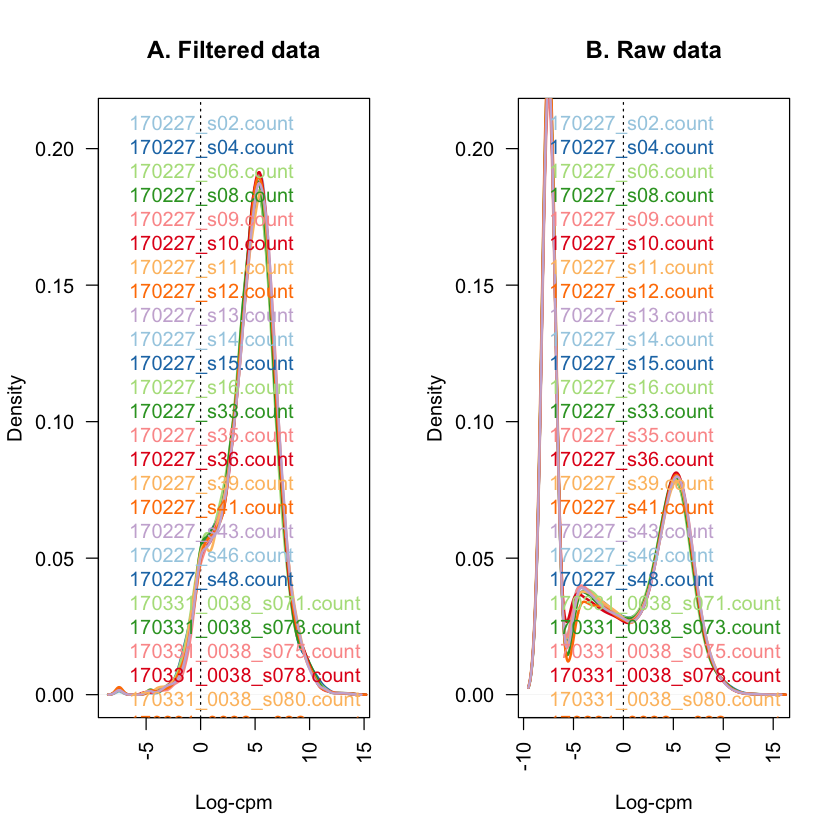

In [75]:
dgeDataLogCPM = cpm(dgeData, log = T)
# NB: prior count of 0.25

nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")

par(mfrow=c(1,2), bg="white")

plot(density(dgeDataLogCPM[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="A. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(dgeDataLogCPM[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", rownames(dgeData$samples), text.col=col, bty="n")

plot(density(dgeDataLogCPMUnfiltered[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="B. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(dgeDataLogCPMUnfiltered[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", rownames(dgeData$samples), text.col=col, bty="n")

In [76]:
dgeData <- calcNormFactors(dgeData, method = "TMM")
dgeData$samples

group lib.size norm.factors aMEM  aMEMwoLArg LArg 
170227_s02.count       5     34955899 0.9955655    FALSE  TRUE      FALSE
170227_s04.count       6     34429660 0.9461916    FALSE  TRUE       TRUE
170227_s06.count       7     35839059 0.9319718     TRUE FALSE      FALSE
170227_s08.count       1     28173803 0.9610078     TRUE FALSE      FALSE
170227_s09.count       1     35708124 1.0449112     TRUE FALSE      FALSE
170227_s10.count       2     43244287 0.9958908    FALSE  TRUE      FALSE
170227_s11.count       2     33474537 1.0169733    FALSE  TRUE      FALSE
170227_s12.count       3     25765627 1.0066425    FALSE  TRUE       TRUE
170227_s13.count       3     30408330 1.0260840    FALSE  TRUE       TRUE
170227_s14.count       4     32206567 1.0122278     TRUE FALSE      FALSE
170227_s15.count       4     27690400 1.0203157     TRUE FALSE      FALSE
170227_s16.count       5     33248472 0.9705997    FALSE  TRUE      FALSE
170227_s33.count       1     45686916 0.9750246     TRUE FALSE      FALSE
170227_s35.count       7     30698353 1.0125621     TRUE FALSE      FALSE
170227_s36.count       5     59184220 1.0353330    FALSE  TRUE      FALSE
170227_s39.count       2     41926975 0.9720065    FALSE  TRUE      FALSE
170227_s41.count       3     51751529 1.0203487    FALSE  TRUE       TRUE
170227_s43.count       4     93121597 1.0462249     TRUE FALSE      FALSE
170227_s46.count       6     74172271 0.9955089    FALSE  TRUE       TRUE
170227_s48.count       7     66022355 1.0237301     TRUE FALSE      FALSE
170331_0038_s071.count 7     34559393 0.9794419     TRUE FALSE      FALSE
170331_0038_s073.count 1     40698245 0.9723158     TRUE FALSE      FALSE
170331_0038_s075.count 2     47570681 1.0000601    FALSE  TRUE      FALSE
170331_0038_s078.count 4     48592799 1.0440427     TRUE FALSE      FALSE
170331_0038_s080.count 5     77904823 1.0237991    FALSE  TRUE      FALSE
170331_0038_s082.count 6     42901197 1.0495882    FALSE  TRUE       TRUE
s06.count              3     50636564 0.9873656    FALSE  TRUE       TRUE
s08.count              6     46048597 0.9485859    FALSE  TRUE       TRUE
                       recArg RANKL
170227_s02.count       FALSE   TRUE
170227_s04.count       FALSE   TRUE
170227_s06.count        TRUE   TRUE
170227_s08.count       FALSE  FALSE
170227_s09.count       FALSE  FALSE
170227_s10.count       FALSE  FALSE
170227_s11.count       FALSE  FALSE
170227_s12.count       FALSE  FALSE
170227_s13.count       FALSE  FALSE
170227_s14.count       FALSE   TRUE
170227_s15.count       FALSE   TRUE
170227_s16.count       FALSE   TRUE
170227_s33.count       FALSE  FALSE
170227_s35.count        TRUE   TRUE
170227_s36.count       FALSE   TRUE
170227_s39.count       FALSE  FALSE
170227_s41.count       FALSE  FALSE
170227_s43.count       FALSE   TRUE
170227_s46.count       FALSE   TRUE
170227_s48.count        TRUE   TRUE
170331_0038_s071.count  TRUE   TRUE
170331_0038_s073.count FALSE  FALSE
170331_0038_s075.count FALSE  FALSE
170331_0038_s078.count FALSE   TRUE
170331_0038_s080.count FALSE   TRUE
170331_0038_s082.count FALSE   TRUE
s06.count              FALSE  FALSE
s08.count              FALSE   TRUE

In [77]:
library(d3heatmap)
sampleLabels = paste0("s", 1:28, "_", conditionList)
d3heatmap(cor(dgeData$counts), theme = "dark", symm=T, labRow = sampleLabels, labCol = sampleLabels)

HTML widgets cannot be represented in plain text (need html)

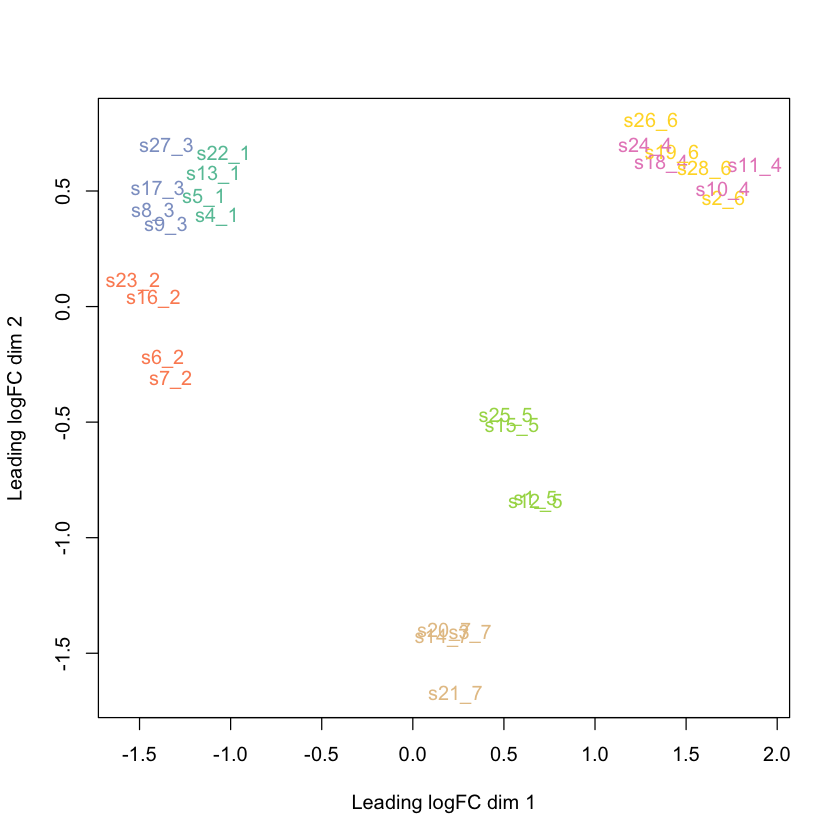

In [78]:
par(bg="white")
colpal = brewer.pal(7, "Set2")
plotMDS(dgeData, labels = sampleLabels, col = colpal[as.numeric(dgeData$samples$group)])

In [79]:
with(data.frame(dgeData$samples), tvr <- aMEM)

In [80]:
design <- with(data.frame(dgeData$samples), 
#    model.matrix(~0+aMEM+LArg+recArg+RANKL))
    model.matrix(~0+group))
design

group1 group2 group3 group4 group5 group6 group7
1  0      0      0      0      1      0      0     
2  0      0      0      0      0      1      0     
3  0      0      0      0      0      0      1     
4  1      0      0      0      0      0      0     
5  1      0      0      0      0      0      0     
6  0      1      0      0      0      0      0     
7  0      1      0      0      0      0      0     
8  0      0      1      0      0      0      0     
9  0      0      1      0      0      0      0     
10 0      0      0      1      0      0      0     
11 0      0      0      1      0      0      0     
12 0      0      0      0      1      0      0     
13 1      0      0      0      0      0      0     
14 0      0      0      0      0      0      1     
15 0      0      0      0      1      0      0     
16 0      1      0      0      0      0      0     
17 0      0      1      0      0      0      0     
18 0      0      0      1      0      0      0     
19 0      0      0      0      0      1      0     
20 0      0      0      0      0      0      1     
21 0      0      0      0      0      0      1     
22 1      0      0      0      0      0      0     
23 0      1      0      0      0      0      0     
24 0      0      0      1      0      0      0     
25 0      0      0      0      1      0      0     
26 0      0      0      0      0      1      0     
27 0      0      1      0      0      0      0     
28 0      0      0      0      0      1      0

In [81]:
contr.matrix <- makeContrasts(
                        g1v2 = group1 - group2,
                        g1v3 = group1 - group3,
                        g1v4 = group1 - group4,
                        g2v3 = group2 - group3,
                        g2v5 = group2 - group5,
                        g3v6 = group3 - group6,
                        g4v5 = group4 - group5,
                        g4v6 = group4 - group6,
                        g4v7 = group4 - group7,
                        g5v7 = group5 - group7,
                        rankl = group6 + group5 + group4 - group3 - group2 - group1,
                        arg = group1 + group4 - group5 - group2,
                        rescue = group1 + group4 - group6 - group3,
                        levels = colnames(design))
contr.matrix

Contrasts
Levels   g1v2 g1v3 g1v4 g2v3 g2v5 g3v6 g4v5 g4v6 g4v7 g5v7 rankl arg rescue
  group1  1    1    1    0    0    0    0    0    0    0   -1     1   1    
  group2 -1    0    0    1    1    0    0    0    0    0   -1    -1   0    
  group3  0   -1    0   -1    0    1    0    0    0    0   -1     0  -1    
  group4  0    0   -1    0    0    0    1    1    1    0    1     1   1    
  group5  0    0    0    0   -1    0   -1    0    0    1    1    -1   0    
  group6  0    0    0    0    0   -1    0   -1    0    0    1     0  -1    
  group7  0    0    0    0    0    0    0    0   -1   -1    0     0   0

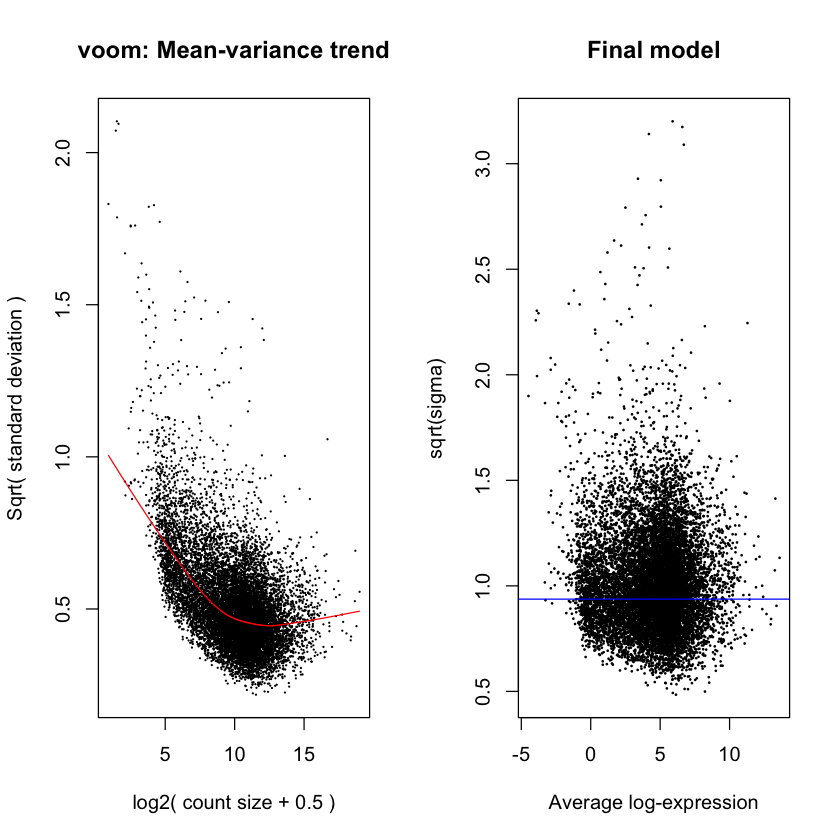

In [82]:
par(mfrow=c(1,2), bg="white")
v <- voom(dgeData, design, plot=TRUE)
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit, main="Final model")

In [83]:
v

An object of class "EList"
$genes
   ENTREZID  SYMBOL TXCHROM
1    497097    Xkr4    chr1
2 100503874 Gm19938    <NA>
3 100038431 Gm10568    <NA>
4     19888     Rp1    chr1
5     20671   Sox17    chr1
26296 more rows ...

$targets
                 group lib.size norm.factors  aMEM aMEMwoLArg  LArg recArg
170227_s02.count     5 34800887    0.9955655 FALSE       TRUE FALSE  FALSE
170227_s04.count     6 32577055    0.9461916 FALSE       TRUE  TRUE  FALSE
170227_s06.count     7 33400992    0.9319718  TRUE      FALSE FALSE   TRUE
170227_s08.count     1 27075245    0.9610078  TRUE      FALSE FALSE  FALSE
170227_s09.count     1 37311820    1.0449112  TRUE      FALSE FALSE  FALSE
                 RANKL
170227_s02.count  TRUE
170227_s04.count  TRUE
170227_s06.count  TRUE
170227_s08.count FALSE
170227_s09.count FALSE
23 more rows ...

$E
       170227_s02.count 170227_s04.count 170227_s06.count 170227_s08.count
27395          5.912027         6.699795         5.930057         5.723401
18777          5.638420         5.208434         5.648557         5.337154
21399          8.042833         7.731085         8.111624         7.085215
108664         7.730794         7.650503         7.892468         7.188552
12421          5.105962         4.506572         4.961242         4.945866
       170227_s09.count 170227_s10.count 170227_s11.count 170227_s12.count
27395          5.309333         5.585174         5.358326         5.526471
18777          5.655340         5.564795         5.653456         5.599415
21399          7.133102         7.296763         7.603014         7.130217
108664         7.016695         7.421397         7.434655         7.030355
12421          5.349718         4.997243         5.533235         5.073737
       170227_s13.count 170227_s14.count 170227_s15.count 170227_s16.count
27395          5.353304         6.188413         6.470553         5.963325
18777          5.780870         5.347679         5.409090         5.382834
21399          7.144818         7.526692         7.646639         7.526146
108664         7.092247         7.180045         7.289338         7.557335
12421          5.340808         4.790966         4.704212         4.702940
       170227_s33.count 170227_s35.count 170227_s36.count 170227_s39.count
27395          5.527352         5.326724         5.803178         5.561423
18777          5.632285         5.851266         5.623336         5.398929
21399          7.102450         7.656725         7.738225         6.908101
108664         7.116055         7.374077         7.395570         7.199616
12421          4.956887         5.414221         5.212829         4.590000
       170227_s41.count 170227_s43.count 170227_s46.count 170227_s48.count
27395          5.341140         6.048064         6.427703         5.493745
18777          5.564832         5.393587         5.171710         5.738066
21399          7.140530         7.567245         7.443896         7.689828
108664         7.075576         7.112028         7.185936         7.471608
12421          5.299429         4.919529         4.316758         5.378406
       170331_0038_s071.count 170331_0038_s073.count 170331_0038_s075.count
27395                5.429232               5.429588               5.239689
18777                5.824725               5.731499               5.761906
21399                8.062425               7.353270               7.185198
108664               7.952987               7.443373               7.301068
12421                5.523052               5.500561               5.319317
       170331_0038_s078.count 170331_0038_s080.count 170331_0038_s082.count
27395                5.892852               5.615195               5.820964
18777                5.713172               5.555678               5.515309
21399                7.711613               7.738599               7.758491
108664               7.240065               7.592179               7.299512
12421                5.329856               5.343537               5.2338

In [84]:
summary(decideTests(efit))

        g1v2  g1v3  g1v4  g2v3  g2v5  g3v6  g4v5  g4v6  g4v7  g5v7 rankl   arg
Down     386   167  2295    37  1532  3182  1422   105  2356   651  3508  1487
NotSig 11248 11617  7261 11785  8765  5726  9294 11704  6835 10090  4746  9158
Up       297   147  2375   109  1634  3023  1215   122  2740  1190  3677  1286
       rescue
Down      242
NotSig  11417
Up        272

In [85]:
tfit <- treat(vfit, lfc=1)
dt <- decideTests(tfit)
summary(dt)

        g1v2  g1v3  g1v4  g2v3  g2v5  g3v6  g4v5  g4v6  g4v7  g5v7 rankl   arg
Down      18     2   239     0   120   320    76     1   132     5  1591   176
NotSig 11902 11926 11437 11922 11689 11207 11784 11930 11499 11823  8923 11634
Up        11     3   255     9   122   404    71     0   300   103  1417   121
       rescue
Down       13
NotSig  11892
Up         26

In [86]:
de.common <- which(dt[,1]!=0 & dt[,2]!=0)
length(de.common)

[1] 5

In [87]:
head(tfit$genes$SYMBOL[de.common], n=20)

[1] "Ccdc150" "Gm4801"  "Gm5458"  "Gpalpp1" "Ndufa11"

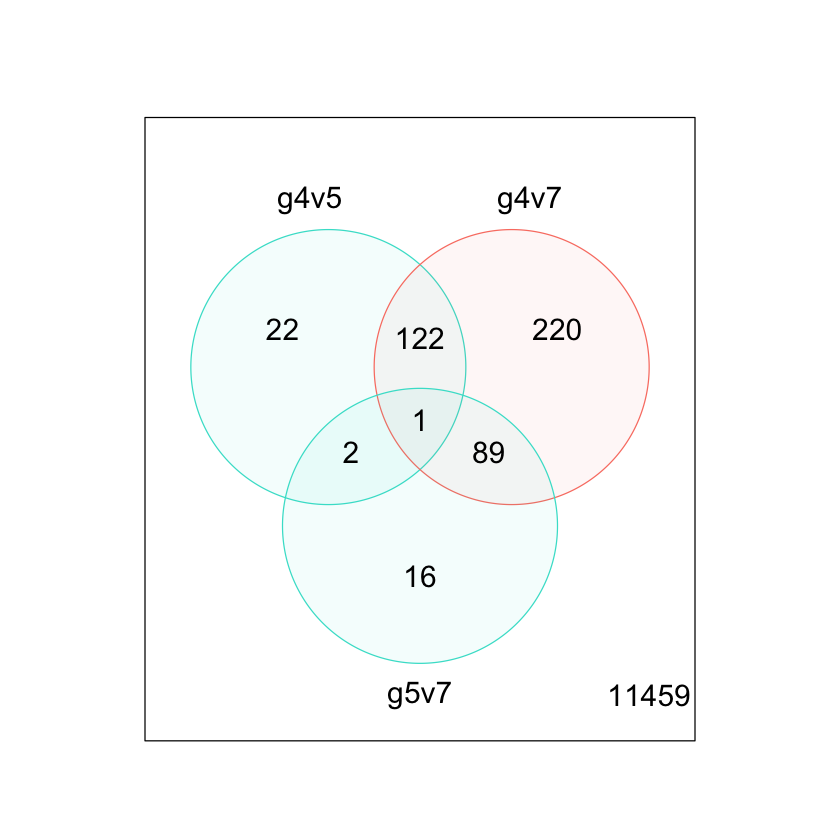

In [88]:
par(bg = "white")
vennDiagram(dt[,c(7,9,10)], circle.col=c("turquoise", "salmon"))

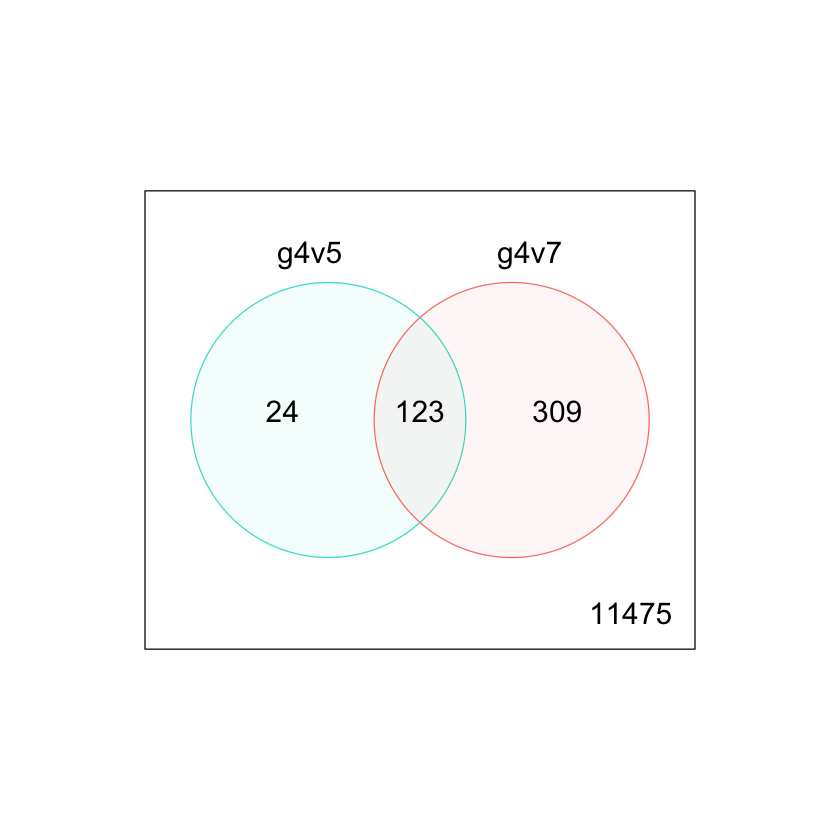

In [89]:
par(bg = "white")
vennDiagram(dt[,c(7,9)], circle.col=c("turquoise", "salmon"))

Adding recArg1 modified more gene expressions than lack of arginine.  
Most of the genes perturbed by lack of arginine are also perturbed by recArg1.  
Looking at the difference between arg$^-$ and recArg1$^+$ samples doesn't show additional information,

### Effect of RANKL

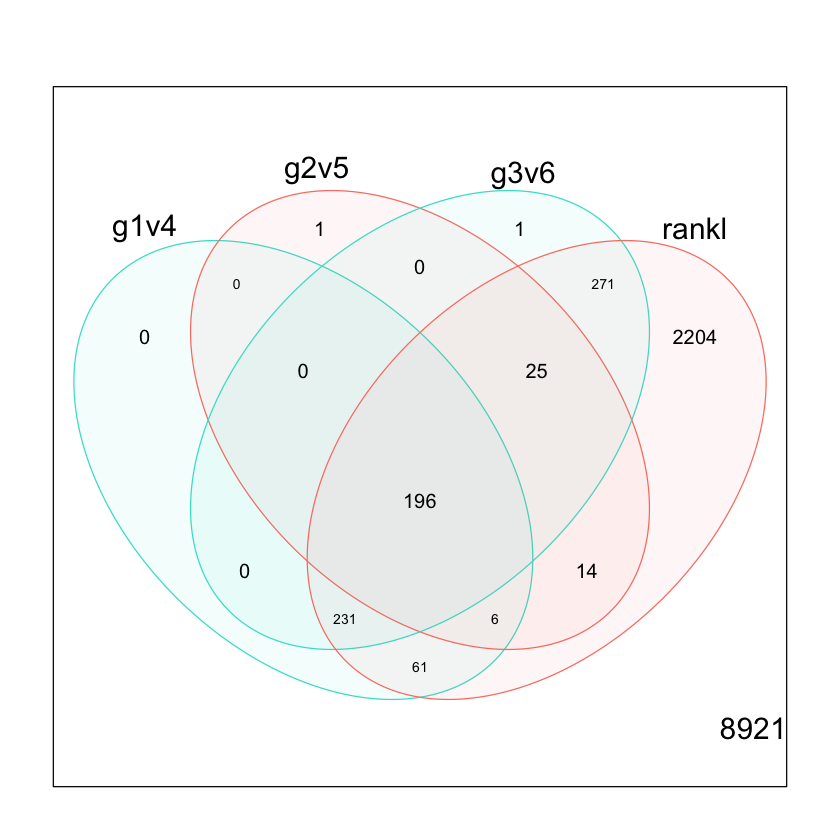

In [90]:
par(bg = "white")
vennDiagram(dt[,c(3,5,6,11)], circle.col=c("turquoise", "salmon"))

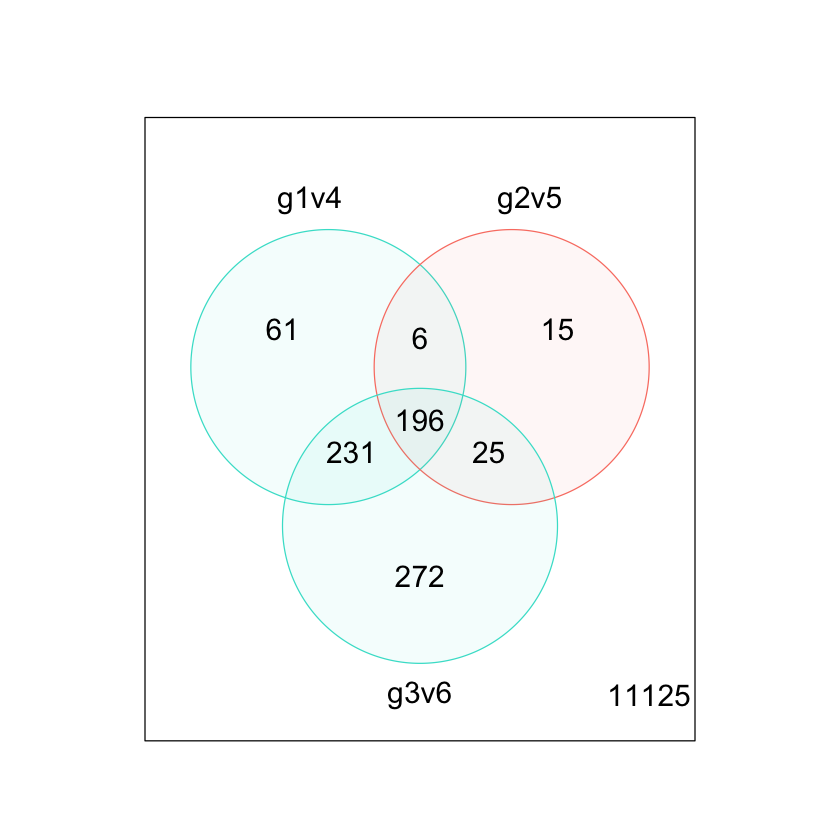

In [91]:
par(bg = "white")
vennDiagram(dt[,c(3,5,6)], circle.col=c("turquoise", "salmon"))

### Effect of arginin depletion

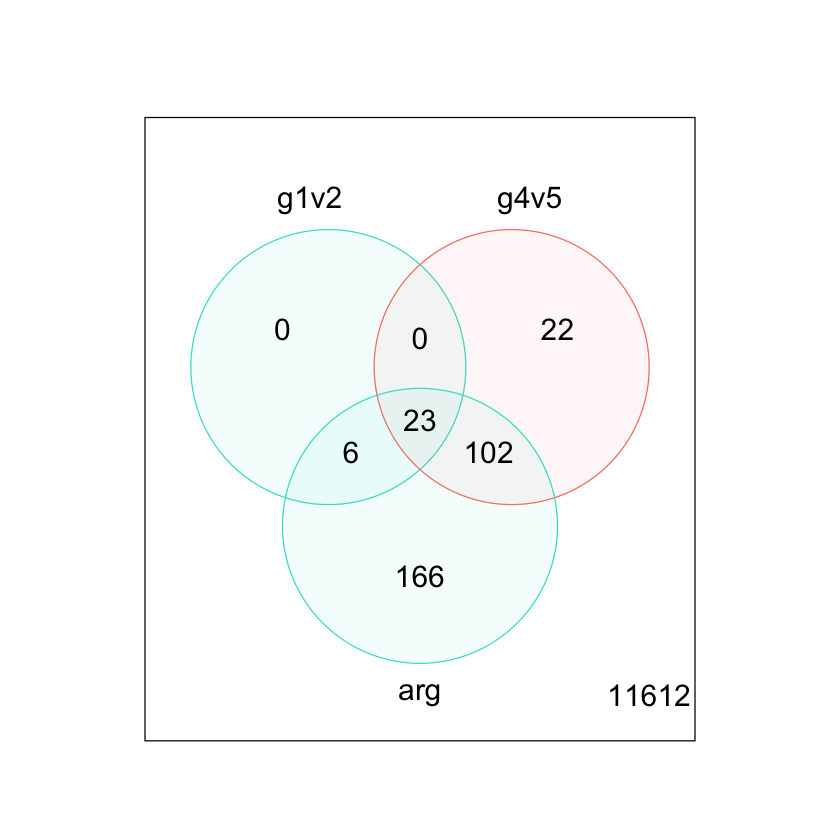

In [92]:
par(bg = "white")
vennDiagram(dt[,c(1,7,12)], circle.col=c("turquoise", "salmon"))

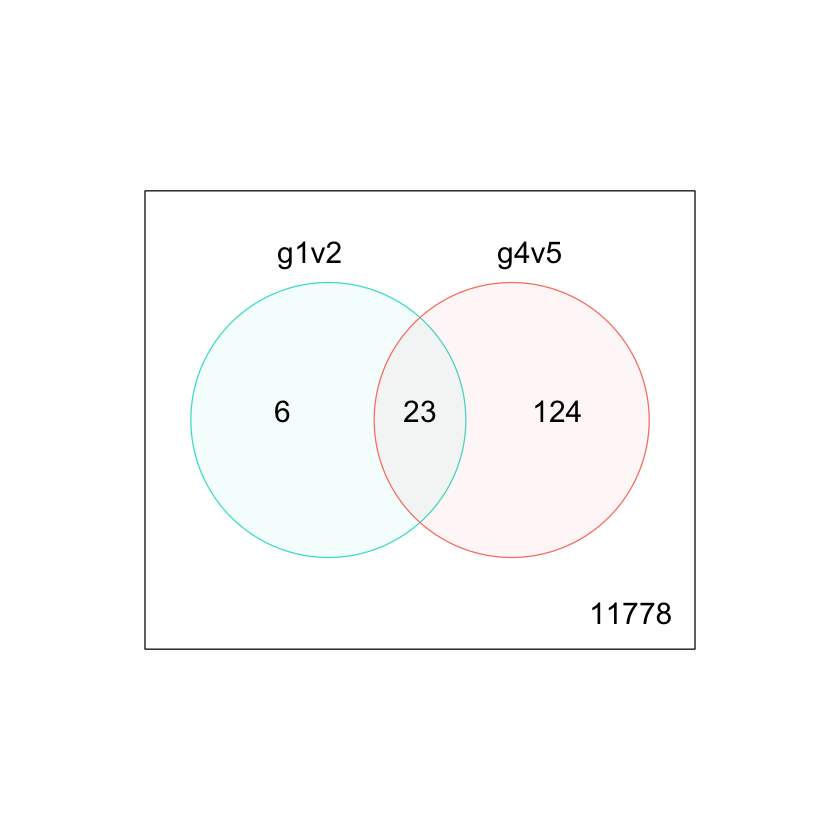

In [93]:
par(bg = "white")
vennDiagram(dt[,c(1,7)], circle.col=c("turquoise", "salmon"))

### Effect of arginin rescue

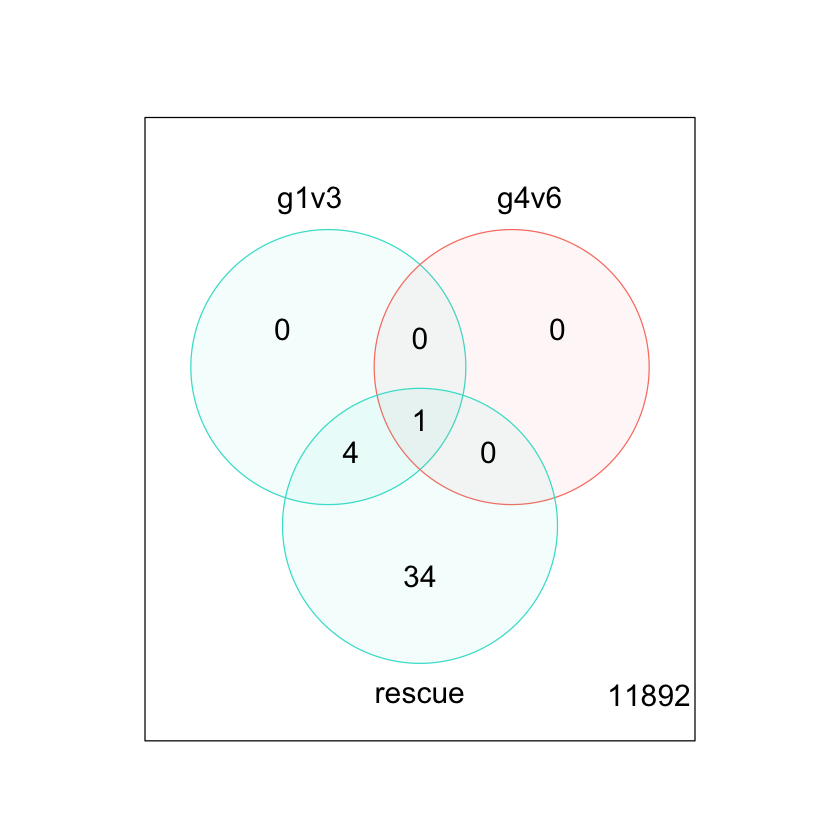

In [94]:
par(bg = "white")
vennDiagram(dt[,c(2,8,13)], circle.col=c("turquoise", "salmon"))

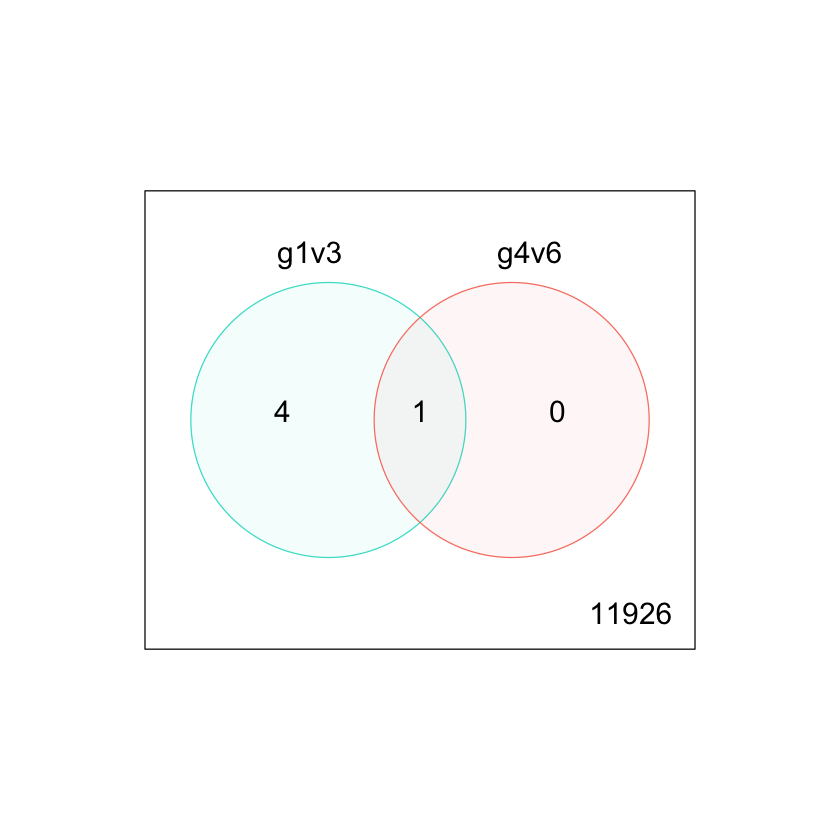

In [95]:
par(bg = "white")
vennDiagram(dt[,c(2,8)], circle.col=c("turquoise", "salmon"))

In [96]:
top4v5 <- topTreat(tfit, coef=7, n=Inf)
top4v7 <- topTreat(tfit, coef=9, n=Inf)
head(top4v7)

ENTREZID SYMBOL  TXCHROM logFC     AveExpr   t         P.Value     
81703  258541   Olfr800 chr10    3.705783 6.2950062  17.89517 5.495012e-16
69065  723967   Mir9-2  chr13   -5.515796 1.7897634 -15.97047 7.426583e-15
18600  55960    Ebag9   chr15    2.682768 4.3367983  14.63546 5.292253e-14
16918  223254   Farp1   chr14    5.176824 1.9453051  14.22835 9.915036e-14
18654  258935   Olfr790 chr10    5.464910 0.5845719  13.78318 2.002471e-13
238161 117600   Srgap1  chr10    5.326514 1.5660198  13.70356 2.274830e-13
       adj.P.Val   
81703  6.556098e-12
69065  4.430328e-11
18600  2.104729e-10
16918  2.957407e-10
18654  4.523500e-10
238161 4.523500e-10

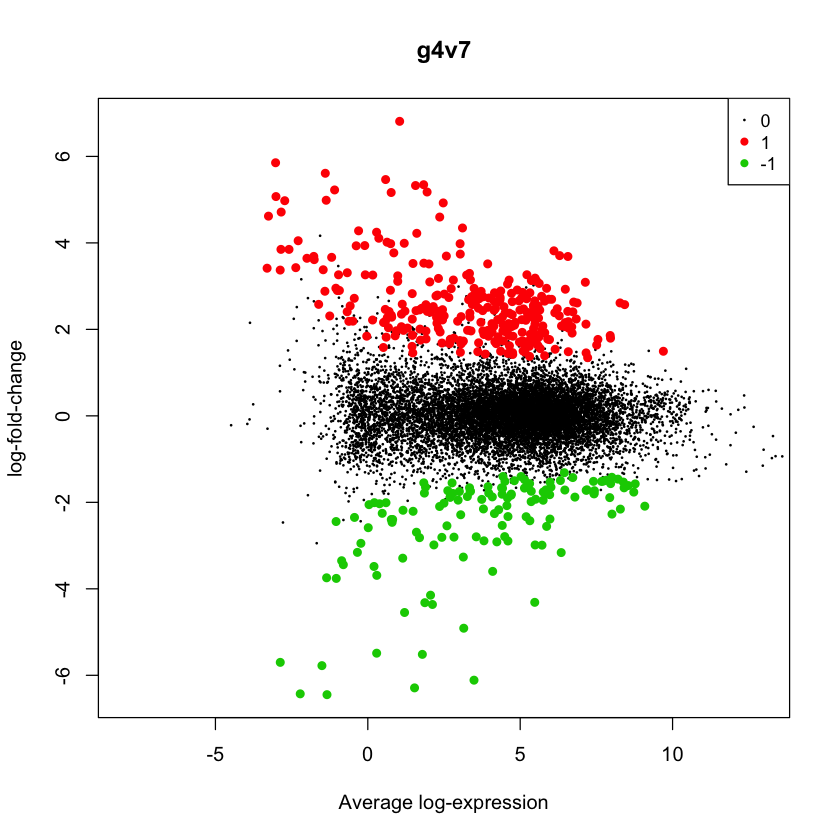

In [97]:
par(bg="white")
plotMD(tfit, column=9, status=dt[,9], main=colnames(tfit)[9], 
       xlim=c(-8,13))

### Previous work on FPKM

In [98]:
# Input sample annotation
dgeData$samples$aMEM = rep(c(TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE),4)
dgeData$samples$aMEMwoLArg = rep(c(FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE),4)
dgeData$samples$LArg = rep(c(FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE),4)
dgeData$samples$recArg = rep(c(FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE),4)
dgeData$samples$RANKL = rep(c(FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE),4)
dgeData$samples$mouse = c(rep(1,7), rep(2,7), rep(3,7), rep(4,7))
dgeData$samples

group lib.size norm.factors aMEM  aMEMwoLArg LArg 
170227_s02.count       5     34955899 0.9955655     TRUE FALSE      FALSE
170227_s04.count       6     34429660 0.9461916    FALSE  TRUE      FALSE
170227_s06.count       7     35839059 0.9319718    FALSE  TRUE       TRUE
170227_s08.count       1     28173803 0.9610078     TRUE FALSE      FALSE
170227_s09.count       1     35708124 1.0449112    FALSE  TRUE      FALSE
170227_s10.count       2     43244287 0.9958908    FALSE  TRUE       TRUE
170227_s11.count       2     33474537 1.0169733     TRUE FALSE      FALSE
170227_s12.count       3     25765627 1.0066425     TRUE FALSE      FALSE
170227_s13.count       3     30408330 1.0260840    FALSE  TRUE      FALSE
170227_s14.count       4     32206567 1.0122278    FALSE  TRUE       TRUE
170227_s15.count       4     27690400 1.0203157     TRUE FALSE      FALSE
170227_s16.count       5     33248472 0.9705997    FALSE  TRUE      FALSE
170227_s33.count       1     45686916 0.9750246    FALSE  TRUE       TRUE
170227_s35.count       7     30698353 1.0125621     TRUE FALSE      FALSE
170227_s36.count       5     59184220 1.0353330     TRUE FALSE      FALSE
170227_s39.count       2     41926975 0.9720065    FALSE  TRUE      FALSE
170227_s41.count       3     51751529 1.0203487    FALSE  TRUE       TRUE
170227_s43.count       4     93121597 1.0462249     TRUE FALSE      FALSE
170227_s46.count       6     74172271 0.9955089    FALSE  TRUE      FALSE
170227_s48.count       7     66022355 1.0237301    FALSE  TRUE       TRUE
170331_0038_s071.count 7     34559393 0.9794419     TRUE FALSE      FALSE
170331_0038_s073.count 1     40698245 0.9723158     TRUE FALSE      FALSE
170331_0038_s075.count 2     47570681 1.0000601    FALSE  TRUE      FALSE
170331_0038_s078.count 4     48592799 1.0440427    FALSE  TRUE       TRUE
170331_0038_s080.count 5     77904823 1.0237991     TRUE FALSE      FALSE
170331_0038_s082.count 6     42901197 1.0495882    FALSE  TRUE      FALSE
s06.count              3     50636564 0.9873656    FALSE  TRUE       TRUE
s08.count              6     46048597 0.9485859     TRUE FALSE      FALSE
                       recArg RANKL mouse
170227_s02.count       FALSE  FALSE 1    
170227_s04.count       FALSE  FALSE 1    
170227_s06.count       FALSE  FALSE 1    
170227_s08.count       FALSE   TRUE 1    
170227_s09.count       FALSE   TRUE 1    
170227_s10.count       FALSE   TRUE 1    
170227_s11.count        TRUE   TRUE 1    
170227_s12.count       FALSE  FALSE 2    
170227_s13.count       FALSE  FALSE 2    
170227_s14.count       FALSE  FALSE 2    
170227_s15.count       FALSE   TRUE 2    
170227_s16.count       FALSE   TRUE 2    
170227_s33.count       FALSE   TRUE 2    
170227_s35.count        TRUE   TRUE 2    
170227_s36.count       FALSE  FALSE 3    
170227_s39.count       FALSE  FALSE 3    
170227_s41.count       FALSE  FALSE 3    
170227_s43.count       FALSE   TRUE 3    
170227_s46.count       FALSE   TRUE 3    
170227_s48.count       FALSE   TRUE 3    
170331_0038_s071.count  TRUE   TRUE 3    
170331_0038_s073.count FALSE  FALSE 4    
170331_0038_s075.count FALSE  FALSE 4    
170331_0038_s078.count FALSE  FALSE 4    
170331_0038_s080.count FALSE   TRUE 4    
170331_0038_s082.count FALSE   TRUE 4    
s06.count              FALSE   TRUE 4    
s08.count               TRUE   TRUE 4

In [99]:
table(rowSums(dgeData$counts==0)>=25)
table(rowSums(dgeData$counts==0)==28)


FALSE 
11931 


FALSE 
11931 

4201 genes are never expressed, 6293 are not expressed in more than 3 conditions, so not even in all replicates of a single condition.

In [100]:
dgeDataExpressed <- dgeData[rowSums(dgeData$counts==0)<25,, keep.lib.sizes=FALSE]
dim(dgeDataExpressed)

[1] 11931    28

Fpkm cannot be used to compare samples so we convert values to TPM
NB: TPM gives the proportion of transcripts in a sample, so one value depends on the others and comparing TPM values of one gene across samples does not make sense without taking into account the other values. On the other hand comparing full TPM profiles between samples seems coherent.

In [101]:
fpkmToTpm <- function(fpkm)
{
    exp(log(fpkm) - log(sum(fpkm)) + log(1e6))
}

In [102]:
dgeDataTPM = apply(dgeDataExpressed, 2, fpkmToTpm)

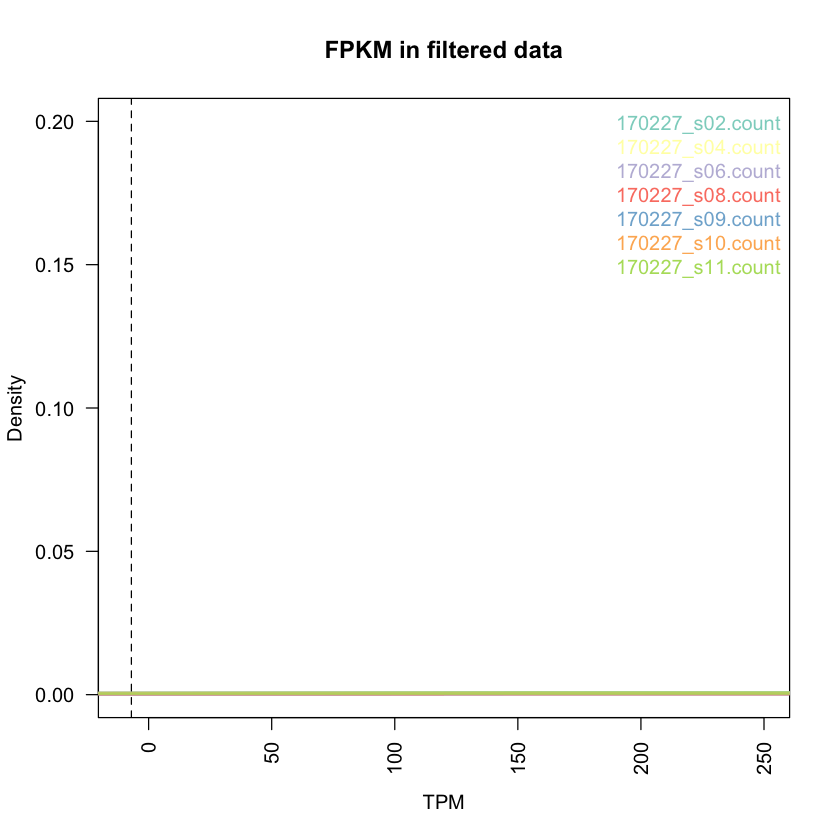

In [103]:
nsamples <- 28
col <- rep(brewer.pal(7, "Set3"), 4)
par(bg="white")

plot(density(dgeDataExpressed$counts[,1]), col=alpha(col[1], 0.8), lwd=2, xlim = c(-10,250), ylim=c(0,0.2), las=2, 
     main="", xlab="")
title(main="FPKM in filtered data", xlab="TPM")
for (i in 2:nsamples){
   den <- density(dgeDataExpressed$counts[,i])
   lines(den$x, den$y, col=alpha(col[i], 0.8), lwd=2)
}
abline(v = -7, lty=2)
legend("topright", rownames(dgeData$samples)[1:7], text.col=col, bty="n")

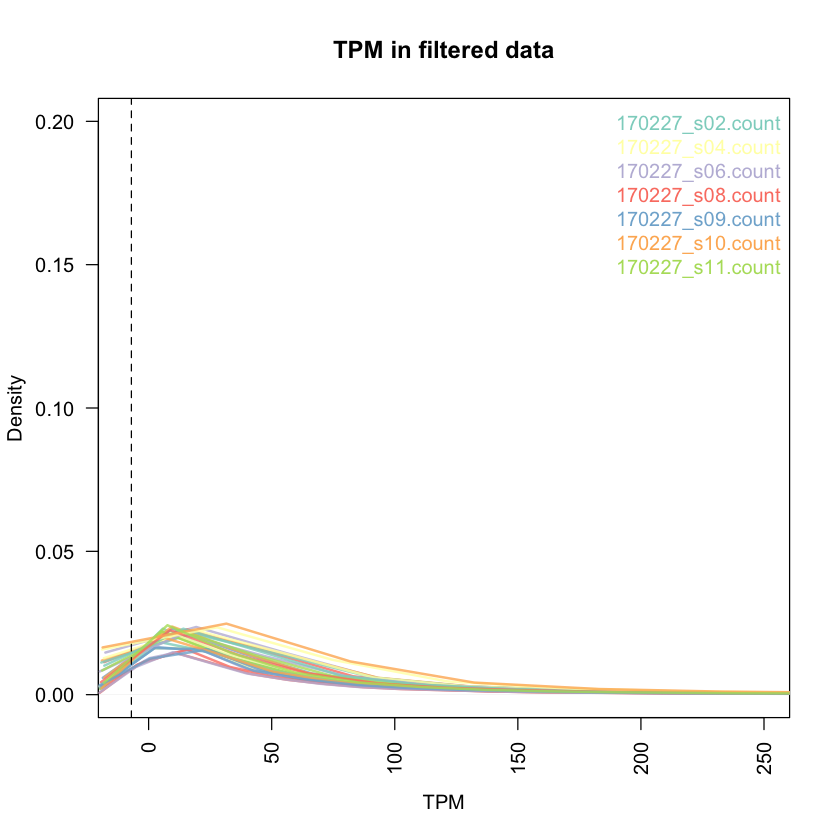

In [104]:
par(bg="white")

plot(density(dgeDataTPM[,1]), col=alpha(col[1], 0.8), lwd=2, xlim = c(-10,250), ylim=c(0,0.2), las=2, 
     main="", xlab="")
title(main="TPM in filtered data", xlab="TPM")
for (i in 2:nsamples){
   den <- density(dgeDataTPM[,i])
   lines(den$x, den$y, col=alpha(col[i], 0.8), lwd=2)
}
abline(v = -7, lty=2)
legend("topright", rownames(dgeData$samples)[1:7], text.col=col, bty="n")

Area under the curve should stay constant, since for every sample TPM values add up to one million.

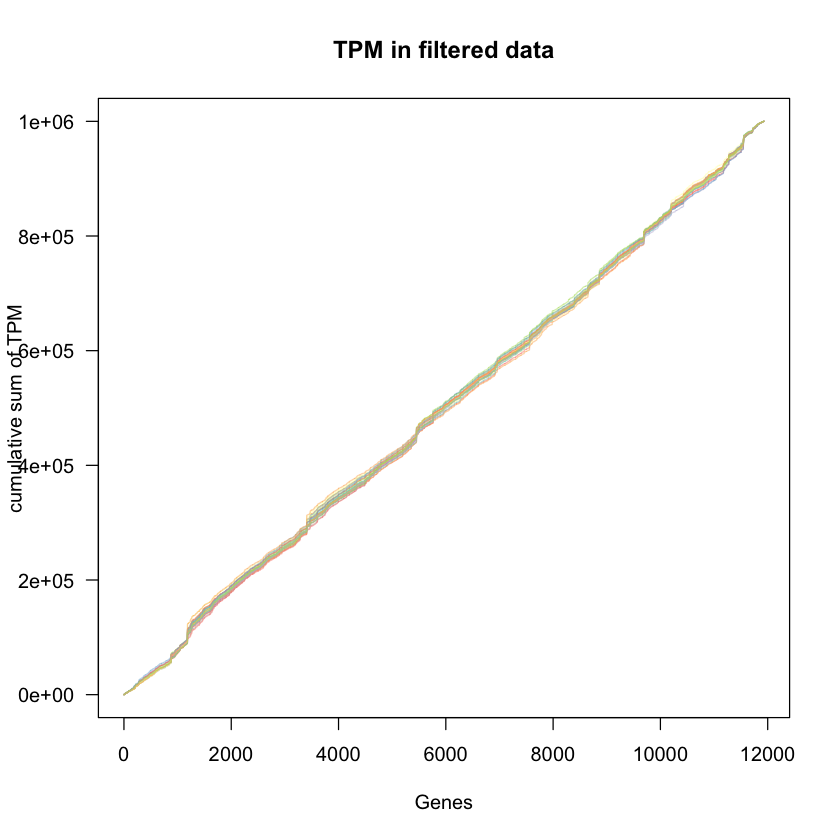

In [105]:
plot(cumsum(dgeDataTPM[,1]), col=alpha(col[1], 0.5), lwd=1, ylim=c(0,1000000), las=1, 
     main="", xlab="", ylab = "", type = "l")
title(main="TPM in filtered data", xlab="Genes", ylab ="cumulative sum of TPM")
for (i in 2:nsamples){
   den <- cumsum(dgeDataTPM[,i])
   lines(den, col=alpha(col[i], 0.5), lwd=1)
}
#legend("topright", rownames(dgeData$samples)[1:7], text.col=col, bty="n")

## TPM correlation between samples

In [106]:
library(d3heatmap)
d3heatmap(cor(dgeDataTPM), theme = "dark")

HTML widgets cannot be represented in plain text (need html)

In [107]:
# Minimal correlation between replicates for each condition
sapply(1:7, function(x) min(cor(dgeDataTPM[,x+0:3*7])))

[1] 0.9297167 0.7793291 0.8236036 0.8746912 0.8890212 0.8780244 0.8568761

In [108]:
# Minimal correlation between conditions for each replicate
sapply(1:4, function(x) min(cor(dgeDataTPM[,7*(x-1) + 1:7])))

[1] 0.8442854 0.8048079 0.8351664 0.8003997

In [109]:
# Minimal overall correlation
min(cor(dgeDataTPM))

[1] 0.7290592

In [110]:
# Median correlation between replicates for each condition
sapply(1:7, function(x) median(cor(dgeDataTPM[,x+0:3*7])))

[1] 0.9543645 0.9573337 0.9034692 0.9175709 0.9449527 0.9513817 0.9510265

In [111]:
# Median correlation between conditions for each replicate
sapply(1:4, function(x) median(cor(dgeDataTPM[,7*(x-1) + 1:7])))

[1] 0.9399559 0.9410990 0.9388520 0.9303048

In [112]:
# Median overall correlation
median(cor(dgeDataTPM))

[1] 0.9275251

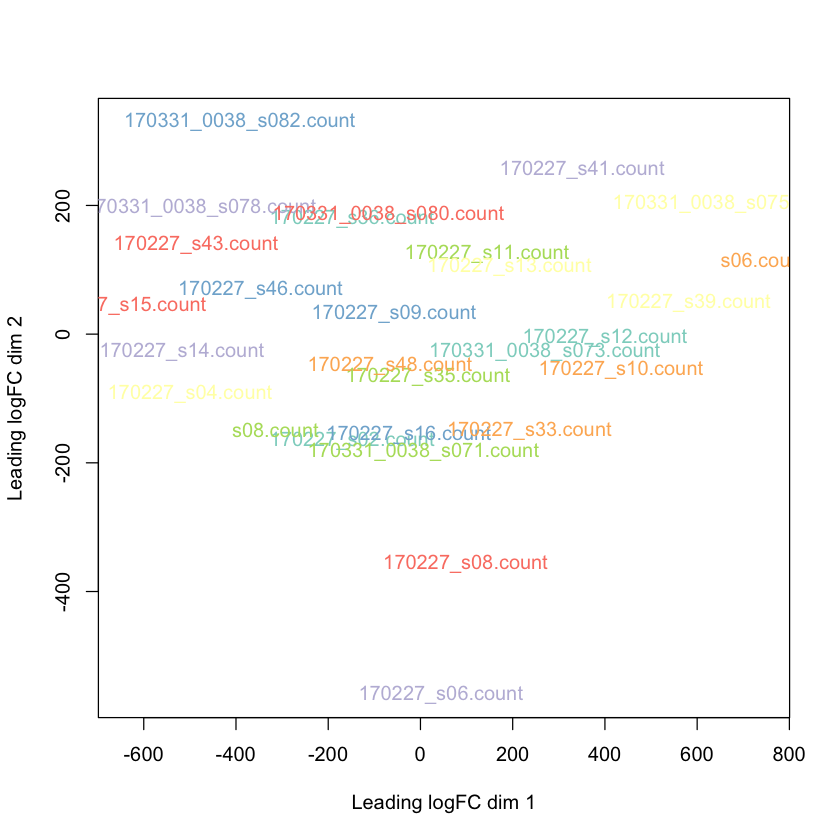

In [113]:
par(bg = "white")
plotMDS(dgeDataTPM, col = col)

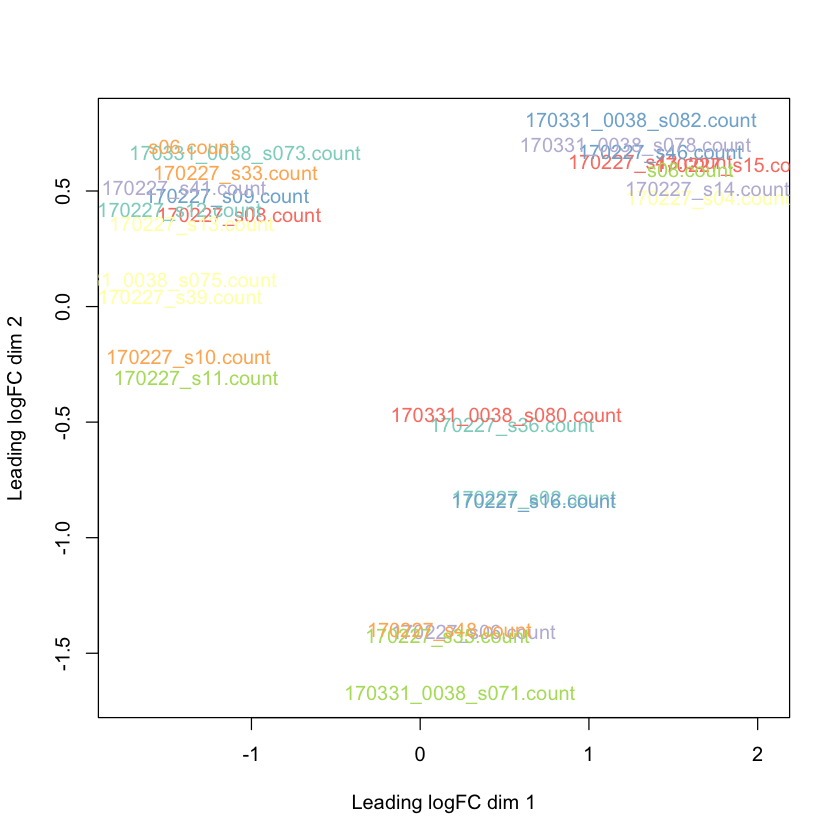

In [114]:
par(bg = "white")
plotMDS(dgeDataExpressed, col = col)

pdf 
  2

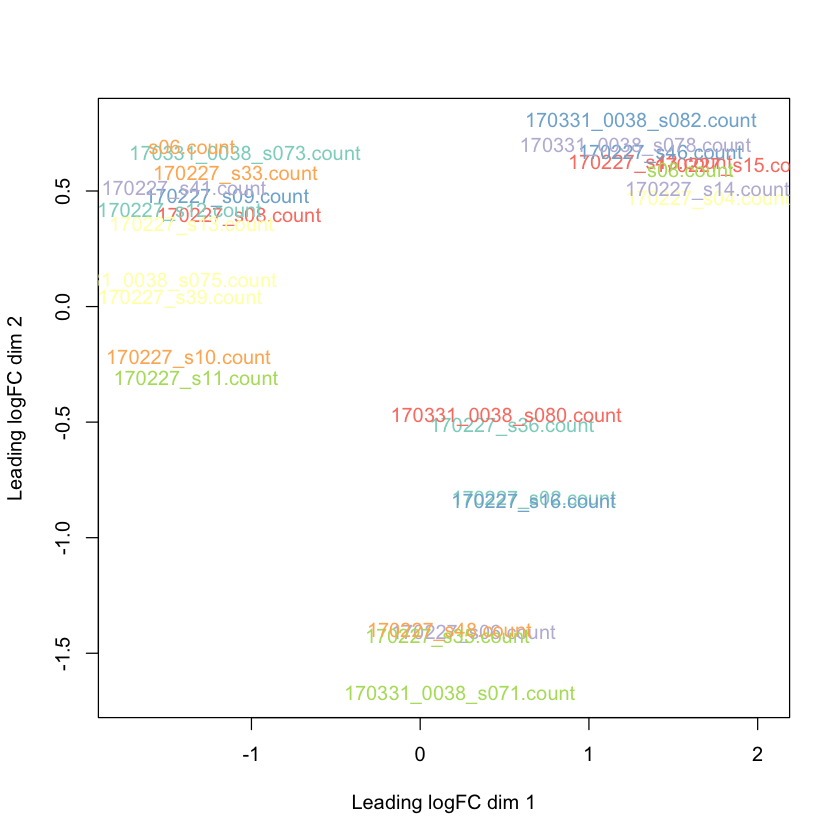

In [115]:
par(bg = "white")
plotMDS(dgeData, col = col)
png("mdsFPKM.png")
plotMDS(dgeData, col = col)
dev.off()

NB: Convertion to TPM fucks things up

In [116]:
colSums(apply(dgeDataExpressed, 2, fpkmToTpm))

170227_s02.count       170227_s04.count       170227_s06.count 
                 1e+06                  1e+06                  1e+06 
      170227_s08.count       170227_s09.count       170227_s10.count 
                 1e+06                  1e+06                  1e+06 
      170227_s11.count       170227_s12.count       170227_s13.count 
                 1e+06                  1e+06                  1e+06 
      170227_s14.count       170227_s15.count       170227_s16.count 
                 1e+06                  1e+06                  1e+06 
      170227_s33.count       170227_s35.count       170227_s36.count 
                 1e+06                  1e+06                  1e+06 
      170227_s39.count       170227_s41.count       170227_s43.count 
                 1e+06                  1e+06                  1e+06 
      170227_s46.count       170227_s48.count 170331_0038_s071.count 
                 1e+06                  1e+06                  1e+06 
170331_0038_s073.count 170331_0038_s075.count 170331_0038_s078.count 
                 1e+06                  1e+06                  1e+06 
170331_0038_s080.count 170331_0038_s082.count              s06.count 
                 1e+06                  1e+06                  1e+06 
             s08.count 
                 1e+06

In [117]:
dgeDataExpressed$counts

170227_s02.count 170227_s04.count 170227_s06.count 170227_s08.count
27395      2095             3386             2036             1430           
18777      1733             1204             1675             1094           
21399      9177             6921             9238             3676           
108664     7392             6545             7936             3949           
12421      1198              740             1040              834           
240690      444              459              397              231           
319263     1191              646             1214             1049           
59014      3030             4670             2613             1241           
76187        50               42               18               32           
72481        98              124               96              114           
17864        96               51               37               84           
70675      1885             1252             1491             1172           
170755     2835             2272             2726             2481           
240697      130              102              131              102           
73824      1438             2035             1577              683           
26754      3442             3993             3227             2603           
211660      520              427              396              429           
211673     2569             2206             2472             1856           
109294     8260             9035            10123             6161           
240726       47               59               14                4           
17978      1165              755             1015              878           
72265      7648             6507             7329             8319           
212442      973              681              931              624           
433273       18               39               34               21           
14048       262              312              263              199           
21749       723              668              383              624           
75799        16               17               11               12           
19989     33798            49357            30536            27372           
98711       187              178              208              317           
100503633    18               26               17               41           
⋮         ⋮                ⋮                ⋮                ⋮               
245688    8593             9227             5527             7589            
353170     277              203              213              140            
67043     1809             1389             2046             1726            
55936     1864             1426             1954             1722            
108012    1660              751             2049             1930            
22184      875             1004              851              634            
56078      876              727              970              801            
20438      187              250              121              127            
12169       41               20               48               63            
69656     1104              588              893             1023            
18700      385              337              240              286            
76763     1056              501             1203              693            
237211     278              361              148              244            
237221     169              263              122              155            
237222     439              384              380              279            
66226      237              209              305              199            
56382     1200              914             1252             1095            
245695      93               84               74               52            
170744     515              179              352             1041            
170743    1301             1004 

In [118]:
dgeDataTPM

170227_s02.count 170227_s04.count 170227_s06.count 170227_s08.count
27395      59.9326597        98.3454382      56.8095273       50.7563711     
18777      49.5767538        34.9698487      46.7367182       38.8303986     
21399     262.5307963       201.0185404     257.7634642      130.4758183     
108664    211.4664538       190.0977239     221.4343853      140.1656709     
12421      34.2717548        21.4930964      29.0186190       29.6019675     
240690     12.7017188        13.3315287      11.0772998        8.1991061     
319263     34.0715025        18.7628922      33.8736572       37.2331701     
59014      86.6806487       135.6388649      72.9092803       44.0480116     
76187       1.4303737         1.2198784       0.5022453        1.1358069     
72481       2.8035325         3.6015459       2.6786418        4.0463121     
17864       2.7463176         1.4812810       1.0323932        2.9814931     
70675      53.9250900        36.3639955      41.6026548       41.5989279     
170755     81.1021911        65.9896148      76.0622649       88.0605291     
240697      3.7189717         2.9625619       3.6552299        3.6203845     
73824      41.1375488        59.1060150      44.0022714       24.2423786     
26754      98.4669283       115.9755862      90.0414266       92.3907930     
211660     14.8758869        12.4020975      11.0493973       15.2269113     
211673     73.4926028        64.0726629      68.9750253       65.8768005     
109294    236.2977419       262.4190887     282.4571929      218.6783233     
240726      1.3445513         1.7136388       0.3906353        0.1419759     
17978      33.3277082        21.9287672      28.3210561       31.1637020     
72265     218.7899673       188.9940243     204.4975567      295.2743014     
212442     27.8350730        19.7794576      25.9772445       22.1482347     
433273      0.5149345         1.1327443       0.9486856        0.7453733     
14048       7.4951584         9.0619541       7.3383623        7.0632992     
21749      20.6832043        19.4018762      10.6866645       22.1482347     
75799       0.4577196         0.4937603       0.3069277        0.4259276     
19989     966.8754335      1433.5604824     852.0312991      971.5408317     
98711       5.3495978         5.1699610       5.8037238       11.2515872     
100503633   0.5149345         0.7551628       0.4743428        1.4552526     
⋮         ⋮                ⋮                ⋮                ⋮               
245688    245.824031       267.9956758      154.217219       269.363706      
353170      7.924271         5.8960791        5.943236         4.969155      
67043      51.750922        40.3431228       57.088552        61.262585      
55936      53.324333        41.4177776       54.521521        61.120609      
108012     47.488408        21.8125883       57.172260        68.503354      
22184      25.031540        29.1609037       23.745043        22.503174      
56078      25.060148        21.1155149       27.065443        28.430667      
20438       5.349598         7.2611812        3.376205         4.507734      
12169       1.172906         0.5808945        1.339321         2.236120      
69656      31.582652        17.0782982       24.916949        36.310327      
18700      11.013878         9.7880723        6.696604        10.151274      
76763      30.209493        14.5514071       33.566730        24.597318      
237211      7.952878        10.4851457        4.129573         8.660528      
237221      4.834663         7.6387626        3.404107         5.501565      
237222     12.558681        11.1531743       10.602957         9.902816      
66226       6.779972         6.0703475        8.510268         7.063299      
56382      34.328970        26.5468785       34.933953        38.865893      
245695      2.660495         2.4397569        2.064786         1.845686      
170744     14.732850         5.1990057        9.821686        36.949218      
170743     37.218325        29.1

In [119]:
# designData <-with(dgeData$samples, model.matrix(~mouse+RANKL+recArg+LArg+aMEM+aMEMwoLArg))
designData <- with(dgeData$samples, model.matrix(~0+mouse+group))
# colnames(designData) <- gsub("group", "", colnames(design))
designData

mouse group1 group2 group3 group4 group5 group6 group7
1  1     0      0      0      0      1      0      0     
2  1     0      0      0      0      0      1      0     
3  1     0      0      0      0      0      0      1     
4  1     1      0      0      0      0      0      0     
5  1     1      0      0      0      0      0      0     
6  1     0      1      0      0      0      0      0     
7  1     0      1      0      0      0      0      0     
8  2     0      0      1      0      0      0      0     
9  2     0      0      1      0      0      0      0     
10 2     0      0      0      1      0      0      0     
11 2     0      0      0      1      0      0      0     
12 2     0      0      0      0      1      0      0     
13 2     1      0      0      0      0      0      0     
14 2     0      0      0      0      0      0      1     
15 3     0      0      0      0      1      0      0     
16 3     0      1      0      0      0      0      0     
17 3     0      0      1      0      0      0      0     
18 3     0      0      0      1      0      0      0     
19 3     0      0      0      0      0      1      0     
20 3     0      0      0      0      0      0      1     
21 3     0      0      0      0      0      0      1     
22 4     1      0      0      0      0      0      0     
23 4     0      1      0      0      0      0      0     
24 4     0      0      0      1      0      0      0     
25 4     0      0      0      0      1      0      0     
26 4     0      0      0      0      0      1      0     
27 4     0      0      1      0      0      0      0     
28 4     0      0      0      0      0      1      0

In [120]:
dgeDataLogTPM = log2(dgeDataTPM+1)

pdf 
  2

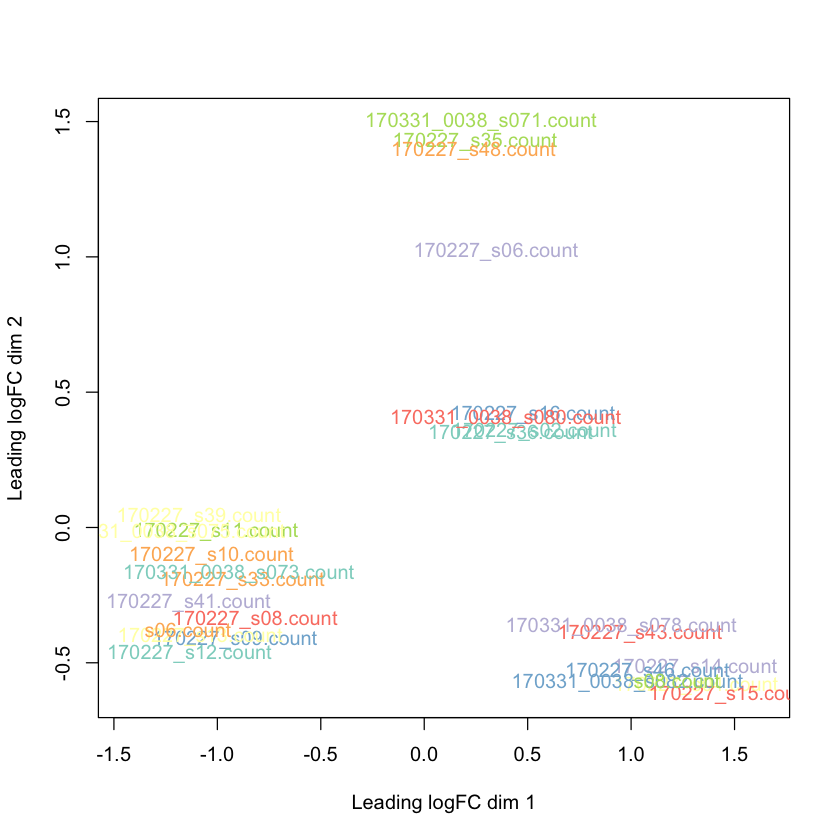

In [121]:
par(bg = "white")
plotMDS(dgeDataLogTPM, col = col)
png("mdsLogTPM.png")
plotMDS(dgeDataLogTPM, col = col)
dev.off()

In [122]:
contrMatrixData <- makeContrasts(
    rescueEff = group6-group5,
    recArgSpec = group7-group4,
    rescueSpec = group6-group4, 
   levels = colnames(designData))
contrMatrixData

Contrasts
Levels   rescueEff recArgSpec rescueSpec
  mouse   0         0          0        
  group1  0         0          0        
  group2  0         0          0        
  group3  0         0          0        
  group4  0        -1         -1        
  group5 -1         0          0        
  group6  1         0          1        
  group7  0         1          0

In [123]:
par(mfrow=c(1,2), bg="white")
v <- voom(x, design, plot=TRUE)
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit, main="Final model")

ERROR: Error in lmFit(y, design, ...): row dimension of design doesn't match column dimension of data object


In [ ]:
lmData = lmFit(dgeDataLogTPM, design = designData)
contrFitData = contrasts.fit(lmData, contrasts=contrMatrixData)
eFitBayes = eBayes(contrFitData, trend = TRUE)

In [ ]:
par(bg="white")
plotSA(eFitBayes, main="limma-trend model")

In [ ]:
x <- calcNormFactors(x, method = "TMM")
x$samples

In [ ]:
par(bg="white")
plotMDS(x) # Three distinct groups (LP/ML/Basal)

In [ ]:
library(d3heatmap)
sampleLabels = paste0("s", 1:28, "_", conditionList)
d3heatmap(cor(dgeData$counts), theme = "dark", symm=T, labRow = sampleLabels, labCol = sampleLabels)

In [ ]:
par(bg = "white")
plotMDS(dgeData$counts, labels = sampleLabels)